# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 
# Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import math
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.options.display.float_format = '{:.5f}'.format

# Load the data

In [3]:
prices = pd.read_csv('input_data/train.csv')

# Simple EDA

In [4]:
# Check the size of data
prices.shape

(1460, 81)

In [5]:
# Peak into the data
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Check on the data types
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Check the distribution of data
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1201.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1452.00000,1460.00000,...,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,730.50000,56.89726,70.04996,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.68526,443.63973,...,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,43.48904,6.32192,2007.81575,180921.19589
std,421.61001,42.30057,24.28475,9981.26493,1.38300,1.11280,30.20290,20.64541,181.06621,456.09809,...,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,496.12302,2.70363,1.32810,79442.50288
min,1.00000,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,365.75000,20.00000,59.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,730.50000,50.00000,69.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,...,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,1095.25000,70.00000,80.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,166.00000,712.25000,...,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,1460.00000,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,...,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,15500.00000,12.00000,2010.00000,755000.00000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Dataset has 1460 datapoints and 81 variables<br>
- Each datapoint refers to the details of one house<br>
- Target variable is the SalePrice which is the selling price of the house <br>
- There are many categorical variables in the dataset <br>
</font>

# Utility Methods

Methods that are used repetitively are written here

## Check Missing in dataframe

In [8]:
# Check for missing values in the dataframe and print them
def print_missing_columns(input_df):
    # Print missing percentage of only columns with missing values
    missing_columns = input_df.columns[input_df.isnull().any()]
    if not missing_columns.empty:
        missing_count = input_df[missing_columns].isnull().sum()
        missing_col_type = pd.Series([type(col) for col in input_df[missing_columns]],index = missing_columns) 
        unique_count = input_df[missing_columns].nunique()

        missing_df = pd.concat({
                        "Missing": missing_count, 
                        "Missing %": missing_count/len(input_df.index)*100,
                        "Type": missing_col_type,
                        "Unique Count": unique_count
                       } , 
                       axis = 1).sort_values(by = 'Missing', ascending = False)

        display(missing_df)
    else:
        display("NO MISSING VALUES IN THE DATAFRAME")

## Print frequency & percentage from value_counts

In [9]:
# Print the frequency of values and percentage of given column
def print_count_percent(col):
    print(f'Column: {col}')
    counts = prices[col].value_counts()
    percent100 = prices[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    display(pd.DataFrame({'Count': counts, 'Percentage': percent100}))

## Print train & test evaluation metrics

In [10]:
# Print & return the R2 score, RSS, MSE and RMSE for the given train & test data
def print_metrics(y_train, y_test, y_pred_train,y_pred_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(f'R2 - train: {r2_train_lr}')
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(f'R2 - test: {r2_test_lr}')
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(f'RSS - train: {rss1_lr}')
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(f'RSS - test: {rss2_lr}')
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(f'MSE - train: {mse_train_lr}, RMSE = {math.sqrt(mse_train_lr)}')
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(f'MSE - test: {mse_test_lr}, RMSE = {math.sqrt(mse_test_lr)}')
    metric.append(mse_test_lr**0.5)
    
    return metric

## Plots to verify assumptions of Linear Regression

In [11]:
# Print the two plots - actual vs predicted & distribution of residuals
def print_pred_plot(y_test, y_pred):
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              
    plt.xlabel('y_test', fontsize=18)                          
    plt.ylabel('y_pred', fontsize=16) 
    
    # Plot the residuals to check for normal distribution
    residuals = y_pred - y_test
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    dist = sns.distplot(residuals,ax = ax[0])
    ax[0].set(xlabel='Residuals (error)',ylabel = 'Density',title = 'Density Plot - Residuals')
    qq = sm.qqplot(residuals,ax=ax[1],line = '45',fit=True)
    ax[1].set(title = 'Q-Q Plot - Residuals')
    plt.show()

## Grid search cv results for tuning alpha for Lasso & Ridge

In [12]:
# Print the details of alpha during grid search CV
def print_alpha_results(gridcv_model, score_param):
    cv_results = pd.DataFrame(gridcv_model.cv_results_)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
    display(cv_results.head())
    
    plt.figure(figsize=(16,8))
    plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
    #plt.xscale('log')
    plt.ylabel(score_param)
    plt.xlabel('Alpha')
    plt.show()

## Stat model functions to fit model & compute VIF

In [13]:
# Utility method to fit a linear model using statsmodels and print the summary
def fit_stats_model(X_data,y_data):
    X_data = sm.add_constant(X_data)
    lm_model = sm.OLS(y_data,X_data).fit()
    print(lm_model.summary())  
    return lm_model

In [14]:
# Utility method to find the VIF of all the variables in the dataset 
def print_vif(X_data):
    vif = pd.DataFrame({'Features':X_data.columns})
    #vif['Features'] = X_data.columns
    vif['VIF'] = [round(variance_inflation_factor(X_data.values, i), 2) for i in range(X_data.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif.head(10))
    

## Compare the metrics of train & test data between models

In [15]:
def compare_model_metrics(metric_lr, metric_ridge, metric_lasso):
    lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                           'MSE (Train)','MSE (Test)'], 
            'Linear Regression': metric_lr
            }

    lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
    rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
    ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

    final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

    return final_metric

## Compare model co-efficients

In [16]:
def compare_model_coeff(cols, lm_coeff, ridge_coeff, lasso_coeff):
    betas = pd.DataFrame(index=cols)
    betas.rows = cols
    betas['Linear'] = lm_coeff
    betas['Ridge'] = ridge_coeff
    betas['Lasso'] = lasso_coeff
    return betas

# Check Missing

Check if there is any missing data in the input dataset

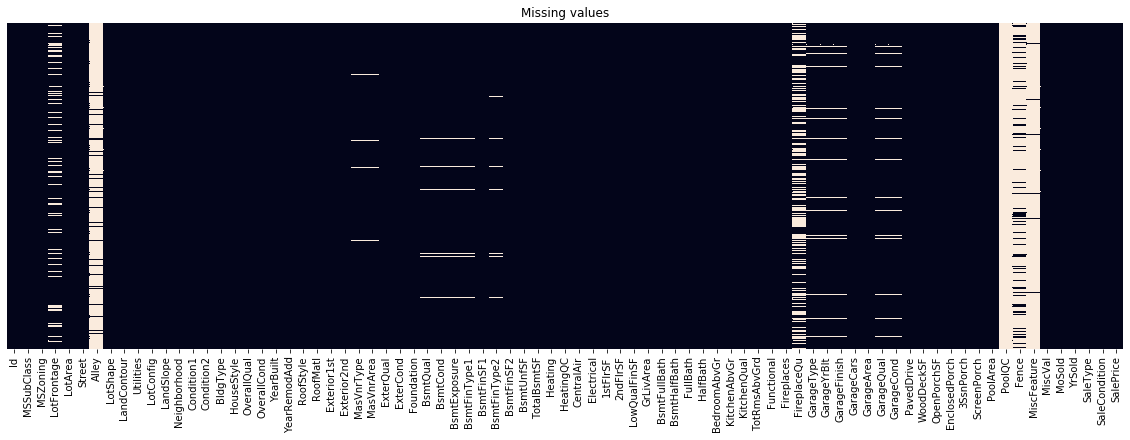

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(prices.isnull(), cbar=False, yticklabels=False)
plt.title("Missing values")
plt.show()

In [18]:
print_missing_columns(prices)

,Missing,Missing %,Type,Unique Count
PoolQC,1453,99.52055,<class 'str'>,3
MiscFeature,1406,96.30137,<class 'str'>,4
Alley,1369,93.76712,<class 'str'>,2
Fence,1179,80.75342,<class 'str'>,4
FireplaceQu,690,47.26027,<class 'str'>,5
LotFrontage,259,17.73973,<class 'str'>,110
GarageType,81,5.54795,<class 'str'>,6
GarageYrBlt,81,5.54795,<class 'str'>,97
GarageFinish,81,5.54795,<class 'str'>,3
GarageQual,81,5.54795,<class 'str'>,5


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- There are columns with missing data <br>
- There are some columns with more than 40% of data missing and can be removed<br>
</font>

# Data Cleanup

## Remove columns not required for the analysis

Some of the columns have the sale related details like the month the site was sold or the type of sale deed. </br>
This information will not be available for the model while predicting the price of a site and can be removed.

In [19]:
prices.shape

(1460, 81)

In [20]:
SALE_RELATED_COLUMNS = ['MoSold','YrSold','SaleType','SaleCondition']


In [21]:
prices.drop(SALE_RELATED_COLUMNS,axis=1,inplace=True)

In [22]:
prices.shape

(1460, 77)

## Drop numeric columns not required

In [23]:
# Id column is the unique identifier and can be removed from the analysis
NUM_COL_TO_DROP = ['Id']

In [24]:
prices.drop(NUM_COL_TO_DROP,axis=1,inplace=True)

In [25]:
prices.shape

(1460, 76)

## Remove rows & columns with all NaN values


In [26]:
prices.shape

(1460, 76)

In [27]:
# Drop rows with all NaN values
prices.dropna(how="all",axis = 0, inplace=True)

In [28]:
# Drop columns with all NaN values
prices.dropna(how="all",axis = 1, inplace=True)

In [29]:
prices.shape

(1460, 76)

There are no empty columns or empty rows in the dataset

## Remove columns with only one unique value

In [30]:
# Drop colums with only one unique value
prices = prices[[col for col in prices.columns if prices[col].nunique() > 1]]

In [31]:
prices.shape

(1460, 76)

There are no columns with only one unique value

## Remove columns with more than x% of missing values

In [32]:
# Remove columns with more than 40% values missing
x = 0.4
prices = prices[[col for col in prices.columns if prices[col].isnull().sum()/len(prices.index) < x]]

In [33]:
prices.shape

(1460, 71)

## Remove categorical columns with high percentage of values for a single category type

In [34]:
# For all non-numeric columns, print the count & percentage distribution within that column
ALL_CATEGORICAL_COLUMNS = prices.select_dtypes(include=['object']).columns
for col in ALL_CATEGORICAL_COLUMNS:
    print_count_percent(col)



Column: MSZoning


,Count,Percentage
RL,1151,78.8%
RM,218,14.9%
FV,65,4.5%
RH,16,1.1%
C (all),10,0.7%


Column: Street


,Count,Percentage
Pave,1454,99.6%
Grvl,6,0.4%


Column: LotShape


,Count,Percentage
Reg,925,63.4%
IR1,484,33.2%
IR2,41,2.8%
IR3,10,0.7%


Column: LandContour


,Count,Percentage
Lvl,1311,89.8%
Bnk,63,4.3%
HLS,50,3.4%
Low,36,2.5%


Column: Utilities


,Count,Percentage
AllPub,1459,99.9%
NoSeWa,1,0.1%


Column: LotConfig


,Count,Percentage
Inside,1052,72.1%
Corner,263,18.0%
CulDSac,94,6.4%
FR2,47,3.2%
FR3,4,0.3%


Column: LandSlope


,Count,Percentage
Gtl,1382,94.7%
Mod,65,4.5%
Sev,13,0.9%


Column: Neighborhood


,Count,Percentage
NAmes,225,15.4%
CollgCr,150,10.3%
OldTown,113,7.7%
Edwards,100,6.8%
Somerst,86,5.9%
Gilbert,79,5.4%
NridgHt,77,5.3%
Sawyer,74,5.1%
NWAmes,73,5.0%
SawyerW,59,4.0%


Column: Condition1


,Count,Percentage
Norm,1260,86.3%
Feedr,81,5.5%
Artery,48,3.3%
RRAn,26,1.8%
PosN,19,1.3%
RRAe,11,0.8%
PosA,8,0.5%
RRNn,5,0.3%
RRNe,2,0.1%


Column: Condition2


,Count,Percentage
Norm,1445,99.0%
Feedr,6,0.4%
RRNn,2,0.1%
PosN,2,0.1%
Artery,2,0.1%
RRAn,1,0.1%
RRAe,1,0.1%
PosA,1,0.1%


Column: BldgType


,Count,Percentage
1Fam,1220,83.6%
TwnhsE,114,7.8%
Duplex,52,3.6%
Twnhs,43,2.9%
2fmCon,31,2.1%


Column: HouseStyle


,Count,Percentage
1Story,726,49.7%
2Story,445,30.5%
1.5Fin,154,10.5%
SLvl,65,4.5%
SFoyer,37,2.5%
1.5Unf,14,1.0%
2.5Unf,11,0.8%
2.5Fin,8,0.5%


Column: RoofStyle


,Count,Percentage
Gable,1141,78.2%
Hip,286,19.6%
Flat,13,0.9%
Gambrel,11,0.8%
Mansard,7,0.5%
Shed,2,0.1%


Column: RoofMatl


,Count,Percentage
CompShg,1434,98.2%
Tar&Grv,11,0.8%
WdShngl,6,0.4%
WdShake,5,0.3%
Membran,1,0.1%
Metal,1,0.1%
Roll,1,0.1%
ClyTile,1,0.1%


Column: Exterior1st


,Count,Percentage
VinylSd,515,35.3%
HdBoard,222,15.2%
MetalSd,220,15.1%
Wd Sdng,206,14.1%
Plywood,108,7.4%
CemntBd,61,4.2%
BrkFace,50,3.4%
WdShing,26,1.8%
Stucco,25,1.7%
AsbShng,20,1.4%


Column: Exterior2nd


,Count,Percentage
VinylSd,504,34.5%
MetalSd,214,14.7%
HdBoard,207,14.2%
Wd Sdng,197,13.5%
Plywood,142,9.7%
CmentBd,60,4.1%
Wd Shng,38,2.6%
Stucco,26,1.8%
BrkFace,25,1.7%
AsbShng,20,1.4%


Column: MasVnrType


,Count,Percentage
None,864,59.5%
BrkFace,445,30.6%
Stone,128,8.8%
BrkCmn,15,1.0%


Column: ExterQual


,Count,Percentage
TA,906,62.1%
Gd,488,33.4%
Ex,52,3.6%
Fa,14,1.0%


Column: ExterCond


,Count,Percentage
TA,1282,87.8%
Gd,146,10.0%
Fa,28,1.9%
Ex,3,0.2%
Po,1,0.1%


Column: Foundation


,Count,Percentage
PConc,647,44.3%
CBlock,634,43.4%
BrkTil,146,10.0%
Slab,24,1.6%
Stone,6,0.4%
Wood,3,0.2%


Column: BsmtQual


,Count,Percentage
TA,649,45.6%
Gd,618,43.4%
Ex,121,8.5%
Fa,35,2.5%


Column: BsmtCond


,Count,Percentage
TA,1311,92.1%
Gd,65,4.6%
Fa,45,3.2%
Po,2,0.1%


Column: BsmtExposure


,Count,Percentage
No,953,67.0%
Av,221,15.5%
Gd,134,9.4%
Mn,114,8.0%


Column: BsmtFinType1


,Count,Percentage
Unf,430,30.2%
GLQ,418,29.4%
ALQ,220,15.5%
BLQ,148,10.4%
Rec,133,9.3%
LwQ,74,5.2%


Column: BsmtFinType2


,Count,Percentage
Unf,1256,88.3%
Rec,54,3.8%
LwQ,46,3.2%
BLQ,33,2.3%
ALQ,19,1.3%
GLQ,14,1.0%


Column: Heating


,Count,Percentage
GasA,1428,97.8%
GasW,18,1.2%
Grav,7,0.5%
Wall,4,0.3%
OthW,2,0.1%
Floor,1,0.1%


Column: HeatingQC


,Count,Percentage
Ex,741,50.8%
TA,428,29.3%
Gd,241,16.5%
Fa,49,3.4%
Po,1,0.1%


Column: CentralAir


,Count,Percentage
Y,1365,93.5%
N,95,6.5%


Column: Electrical


,Count,Percentage
SBrkr,1334,91.4%
FuseA,94,6.4%
FuseF,27,1.9%
FuseP,3,0.2%
Mix,1,0.1%


Column: KitchenQual


,Count,Percentage
TA,735,50.3%
Gd,586,40.1%
Ex,100,6.8%
Fa,39,2.7%


Column: Functional


,Count,Percentage
Typ,1360,93.2%
Min2,34,2.3%
Min1,31,2.1%
Mod,15,1.0%
Maj1,14,1.0%
Maj2,5,0.3%
Sev,1,0.1%


Column: GarageType


,Count,Percentage
Attchd,870,63.1%
Detchd,387,28.1%
BuiltIn,88,6.4%
Basment,19,1.4%
CarPort,9,0.7%
2Types,6,0.4%


Column: GarageFinish


,Count,Percentage
Unf,605,43.9%
RFn,422,30.6%
Fin,352,25.5%


Column: GarageQual


,Count,Percentage
TA,1311,95.1%
Fa,48,3.5%
Gd,14,1.0%
Po,3,0.2%
Ex,3,0.2%


Column: GarageCond


,Count,Percentage
TA,1326,96.2%
Fa,35,2.5%
Gd,9,0.7%
Po,7,0.5%
Ex,2,0.1%


Column: PavedDrive


,Count,Percentage
Y,1340,91.8%
N,90,6.2%
P,30,2.1%


In [35]:
# Drop columns where one category type is very significant (>85%)
CATEGORICAL_COLS_TO_DROP = ['Street','Utilities','LandSlope','Condition1','Condition2','RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','LandContour','ExterCond','BsmtFinType2']

prices.drop(CATEGORICAL_COLS_TO_DROP, axis=1, inplace=True)

In [36]:
# Drop columns with multiple category values almost equally distributed & without much info
CATEGORIES_MANY_TYPES_TO_DROP = ['Neighborhood']
prices.drop(CATEGORIES_MANY_TYPES_TO_DROP, axis=1, inplace=True)

In [37]:
prices.shape

(1460, 53)

## Check missing

In [38]:
print_missing_columns(prices)

,Missing,Missing %,Type,Unique Count
LotFrontage,259,17.73973,<class 'str'>,110
GarageType,81,5.54795,<class 'str'>,6
GarageYrBlt,81,5.54795,<class 'str'>,97
GarageFinish,81,5.54795,<class 'str'>,3
BsmtExposure,38,2.60274,<class 'str'>,4
BsmtQual,37,2.53425,<class 'str'>,4
BsmtFinType1,37,2.53425,<class 'str'>,6
MasVnrType,8,0.54795,<class 'str'>,4
MasVnrArea,8,0.54795,<class 'str'>,327


# Treat Missing

## Treat Missing: Categorical

### Missing Garage Caterogical: Assume that garage does not exist for missing rows. Fill with NA -> No Garage

In [39]:
prices['GarageType'].fillna('NA',inplace=True)
prices['GarageFinish'].fillna('NA',inplace=True)


### Missing Basement Caterogical: Assume that basement does not exist for missing rows. Fill with NA -> No Basement

In [40]:
prices['BsmtExposure'].fillna('NA',inplace=True)
prices['BsmtQual'].fillna('NA',inplace=True)
prices['BsmtFinType1'].fillna('NA',inplace=True)

### Treat missing: Categorical with mode

In [41]:
# Fill the remaining categorical columns with mode
prices['MasVnrType'].fillna(prices['MasVnrType'].mode()[0],inplace=True)

## Treat missing: Numeric with median

Some numeric columns are present as string. Convert them to numeric and filling missing values with the median

In [42]:
NUM_COLUMNS_TO_TREAT = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [43]:
for col in NUM_COLUMNS_TO_TREAT:
    prices[col] = pd.to_numeric(prices[col])
    prices[col].fillna(prices[col].median(),inplace=True) 

In [44]:
print_missing_columns(prices)

'NO MISSING VALUES IN THE DATAFRAME'

<font color='green'>
<b>OBSERVATIONS:</b> <br>
- All the missing categorical & numerical data has been treated
</font>

In [45]:
prices.shape

(1460, 53)

# Derived Variables

## Change year columns to number of years

There are some year columns in the data. These can be converted to number of years based on the maximum year in that column.

In [46]:
YEAR_COLUMNS = ['YearBuilt','YearRemodAdd','GarageYrBlt'] 

def add_num_years_column(year_col):
    num_years_col = f'{year_col}_num_years'
    prices[num_years_col] = prices[year_col].max() - prices[year_col]
    
for year_col in YEAR_COLUMNS:
    add_num_years_column(year_col)
    
prices.drop(YEAR_COLUMNS, axis = 1, inplace = True)    

In [47]:
prices.shape

(1460, 53)

# Handle categorical data

## Convert ordinal categorical variables

From the data dictionary, it is seen that some of the categorical variables are rated on a scale (ordinal). <br>
These columns can be converted to numeric columns based on their level

In [48]:
ORD_CAT_COLUMNS = ['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish','LotShape']

In [49]:
prices[ORD_CAT_COLUMNS].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,LotShape
0,Gd,Gd,No,GLQ,Ex,Gd,RFn,Reg
1,TA,Gd,Gd,ALQ,Ex,TA,RFn,Reg
2,Gd,Gd,Mn,GLQ,Ex,Gd,RFn,IR1
3,TA,TA,No,ALQ,Gd,Gd,Unf,IR1
4,Gd,Gd,Av,GLQ,Ex,Gd,RFn,IR1


In [50]:
prices['ExterQual'] = prices['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
prices['BsmtQual'] = prices['BsmtQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
prices['BsmtExposure'] = prices['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
prices['BsmtFinType1'] = prices['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
prices['HeatingQC'] = prices['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
prices['KitchenQual'] = prices['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
prices['GarageFinish'] = prices['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
prices['LotShape'] = prices['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [51]:
prices[ORD_CAT_COLUMNS].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,LotShape
0,3,4,1,6,4,3,2,3
1,2,4,4,5,4,2,2,3
2,3,4,2,6,4,3,2,0
3,2,3,1,5,3,3,1,0
4,3,4,3,6,4,3,2,0


## Group categorical columns based on distribution

Group the categorical columns based on the percentage distribution. Otherwise the number of dummy variables created might become too high.<br>
New category as "Others" created to group categorys with lower distributions.

In [52]:
# For all non-numeric columns, print the count & percentage distribution within that column
ALL_CATEGORICAL_COLUMNS = prices.select_dtypes(include=['object']).columns
for col in ALL_CATEGORICAL_COLUMNS:
    print_count_percent(col)

Column: MSZoning


,Count,Percentage
RL,1151,78.8%
RM,218,14.9%
FV,65,4.5%
RH,16,1.1%
C (all),10,0.7%


Column: LotConfig


,Count,Percentage
Inside,1052,72.1%
Corner,263,18.0%
CulDSac,94,6.4%
FR2,47,3.2%
FR3,4,0.3%


Column: BldgType


,Count,Percentage
1Fam,1220,83.6%
TwnhsE,114,7.8%
Duplex,52,3.6%
Twnhs,43,2.9%
2fmCon,31,2.1%


Column: HouseStyle


,Count,Percentage
1Story,726,49.7%
2Story,445,30.5%
1.5Fin,154,10.5%
SLvl,65,4.5%
SFoyer,37,2.5%
1.5Unf,14,1.0%
2.5Unf,11,0.8%
2.5Fin,8,0.5%


Column: RoofStyle


,Count,Percentage
Gable,1141,78.2%
Hip,286,19.6%
Flat,13,0.9%
Gambrel,11,0.8%
Mansard,7,0.5%
Shed,2,0.1%


Column: Exterior1st


,Count,Percentage
VinylSd,515,35.3%
HdBoard,222,15.2%
MetalSd,220,15.1%
Wd Sdng,206,14.1%
Plywood,108,7.4%
CemntBd,61,4.2%
BrkFace,50,3.4%
WdShing,26,1.8%
Stucco,25,1.7%
AsbShng,20,1.4%


Column: Exterior2nd


,Count,Percentage
VinylSd,504,34.5%
MetalSd,214,14.7%
HdBoard,207,14.2%
Wd Sdng,197,13.5%
Plywood,142,9.7%
CmentBd,60,4.1%
Wd Shng,38,2.6%
Stucco,26,1.8%
BrkFace,25,1.7%
AsbShng,20,1.4%


Column: MasVnrType


,Count,Percentage
None,872,59.7%
BrkFace,445,30.5%
Stone,128,8.8%
BrkCmn,15,1.0%


Column: Foundation


,Count,Percentage
PConc,647,44.3%
CBlock,634,43.4%
BrkTil,146,10.0%
Slab,24,1.6%
Stone,6,0.4%
Wood,3,0.2%


Column: GarageType


,Count,Percentage
Attchd,870,59.6%
Detchd,387,26.5%
BuiltIn,88,6.0%
NA,81,5.5%
Basment,19,1.3%
CarPort,9,0.6%
2Types,6,0.4%


In [53]:
# Based on distribution, create a new type as 'Others'
prices['MSZoning'] = prices['MSZoning'].map({'RL':'RL','RM':'RM'}).fillna('Others')
prices['LotConfig'] = prices['LotConfig'].map({'Inside':'Inside','Corner':'Corner'}).fillna('Others')
prices['BldgType'] = prices['BldgType'].map({'1Fam':'1Fam','TwnhsE':'TwnhsE'}).fillna('Others')
prices['HouseStyle'] = prices['HouseStyle'].map({'1Story':'1Story','2Story':'2Story','1.5Fin':'1.5Fin'}).fillna('Others')
prices['RoofStyle'] = prices['RoofStyle'].map({'Gable':'Gable','Hip':'Hip'}).fillna('Others')
prices['Exterior1st'] = prices['Exterior1st'].map({'VinylSd':'VinylSd','HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wd Sdng','Plywood':'Plywood'}).fillna('Others')
prices['Exterior2nd'] = prices['Exterior2nd'].map({'VinylSd':'VinylSd','HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wd Sdng','Plywood':'Plywood'}).fillna('Others')
prices['MasVnrType'] = prices['MasVnrType'].map({'None':'None','BrkFace':'BrkFace'}).fillna('Others')
prices['Foundation'] = prices['Foundation'].map({'PConc':'PConc','CBlock':'CBlock','BrkTil':'BrkTil'}).fillna('Others')
prices['GarageType'] = prices['GarageType'].map({'Attchd':'Attchd','Detchd':'Detchd','BuiltIn':'BuiltIn','NA':'NA'}).fillna('Others')

In [54]:
# Verify changes
# For all non-numeric columns, print the count & percentage distribution within that column
ALL_CATEGORICAL_COLUMNS = prices.select_dtypes(include=['object']).columns
for col in ALL_CATEGORICAL_COLUMNS:
    print_count_percent(col)

Column: MSZoning


,Count,Percentage
RL,1151,78.8%
RM,218,14.9%
Others,91,6.2%


Column: LotConfig


,Count,Percentage
Inside,1052,72.1%
Corner,263,18.0%
Others,145,9.9%


Column: BldgType


,Count,Percentage
1Fam,1220,83.6%
Others,126,8.6%
TwnhsE,114,7.8%


Column: HouseStyle


,Count,Percentage
1Story,726,49.7%
2Story,445,30.5%
1.5Fin,154,10.5%
Others,135,9.2%


Column: RoofStyle


,Count,Percentage
Gable,1141,78.2%
Hip,286,19.6%
Others,33,2.3%


Column: Exterior1st


,Count,Percentage
VinylSd,515,35.3%
HdBoard,222,15.2%
MetalSd,220,15.1%
Wd Sdng,206,14.1%
Others,189,12.9%
Plywood,108,7.4%


Column: Exterior2nd


,Count,Percentage
VinylSd,504,34.5%
MetalSd,214,14.7%
HdBoard,207,14.2%
Wd Sdng,197,13.5%
Others,196,13.4%
Plywood,142,9.7%


Column: MasVnrType


,Count,Percentage
None,872,59.7%
BrkFace,445,30.5%
Others,143,9.8%


Column: Foundation


,Count,Percentage
PConc,647,44.3%
CBlock,634,43.4%
BrkTil,146,10.0%
Others,33,2.3%


Column: GarageType


,Count,Percentage
Attchd,870,59.6%
Detchd,387,26.5%
BuiltIn,88,6.0%
NA,81,5.5%
Others,34,2.3%


# Treat Outliers

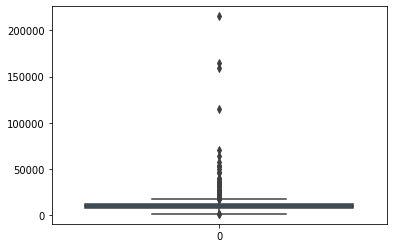

In [55]:
sns.boxplot(data=prices['LotArea'])

In [56]:
# Extract the area columns from the data dictionary
AREA_COLUMNS = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

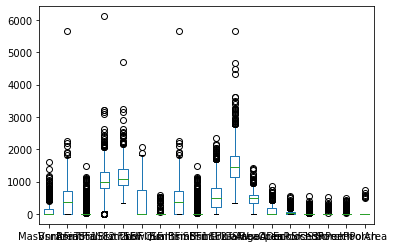

In [57]:
prices[AREA_COLUMNS].drop(['LotArea'],axis=1).plot.box()

In [58]:
prices[AREA_COLUMNS].describe(percentiles = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,10516.82808,103.11712,443.63973,46.54932,1057.42945,1162.62671,346.99247,5.84452,443.63973,46.54932,567.24041,1515.46370,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890
std,9981.26493,180.73137,456.09809,161.31927,438.70532,386.58774,436.52844,48.62308,456.09809,161.31927,441.86696,525.48038,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731
min,1300.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1%,1680.00000,0.00000,0.00000,0.00000,0.00000,520.00000,0.00000,0.00000,0.00000,0.00000,0.00000,692.18000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5%,3311.70000,0.00000,0.00000,0.00000,519.30000,672.95000,0.00000,0.00000,0.00000,0.00000,0.00000,848.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10%,5000.00000,0.00000,0.00000,0.00000,636.90000,756.90000,0.00000,0.00000,0.00000,0.00000,74.90000,912.00000,240.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,7553.50000,0.00000,0.00000,0.00000,795.75000,882.00000,0.00000,0.00000,0.00000,0.00000,223.00000,1129.50000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,9478.50000,0.00000,383.50000,0.00000,991.50000,1087.00000,0.00000,0.00000,383.50000,0.00000,477.50000,1464.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000
75%,11601.50000,164.25000,712.25000,0.00000,1298.25000,1391.25000,728.00000,0.00000,712.25000,0.00000,808.00000,1776.75000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000


<font color = 'green'>
    <b>OBSERVATIONS:</b> <br>
    - Looking at the box plots and percentile distribution, it is clear that there are outliers in the data. <br>
    - Let us remove the outliers from LotArea, this could remove the outliers in other area columns as well. <br>
    - Remove outliers in LotArea with floor & cap from 1% to 99% <br>
</font>

In [59]:
prices.shape

(1460, 53)

In [60]:
AREA_OUTLIERS_COLUMNS = ['LotArea']

In [61]:
# Drop outliers with a floor of 1% and cap of 99% 
for col in AREA_OUTLIERS_COLUMNS:
    floor = prices[col].quantile(.01)
    cap = prices[col].quantile(.99)
    prices =  prices[(prices[col] >= floor) & (prices[col] <= cap)] 

In [62]:
prices.shape

(1438, 53)

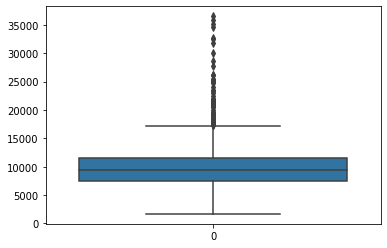

In [63]:
sns.boxplot(data=prices['LotArea'])

In [64]:
prices[AREA_COLUMNS].describe(percentiles = [0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000,1438.00000
mean,9816.90890,102.25243,434.64047,45.15855,1050.86996,1157.45967,345.82893,5.93394,434.64047,45.15855,571.07093,1509.22253,472.40960,92.26356,46.25104,22.25522,3.46175,15.02364,2.46732
std,4209.46168,178.80602,430.30788,158.28242,413.18442,369.67890,435.15745,48.98845,430.30788,158.28242,442.54970,504.93542,211.64724,121.70358,65.39689,61.52283,29.53784,55.75913,38.47384
min,1680.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1%,1941.18000,0.00000,0.00000,0.00000,0.00000,520.00000,0.00000,0.00000,0.00000,0.00000,0.00000,712.44000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5%,3630.35000,0.00000,0.00000,0.00000,517.90000,683.70000,0.00000,0.00000,0.00000,0.00000,0.00000,848.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10%,5103.50000,0.00000,0.00000,0.00000,648.00000,764.00000,0.00000,0.00000,0.00000,0.00000,75.00000,912.00000,240.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,7560.00000,0.00000,0.00000,0.00000,796.00000,882.00000,0.00000,0.00000,0.00000,0.00000,227.50000,1128.50000,336.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,9452.50000,0.00000,378.50000,0.00000,990.50000,1086.00000,0.00000,0.00000,378.50000,0.00000,483.50000,1458.00000,479.50000,0.00000,24.50000,0.00000,0.00000,0.00000,0.00000
75%,11494.50000,164.00000,705.75000,0.00000,1284.00000,1382.75000,728.00000,0.00000,705.75000,0.00000,810.75000,1773.25000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000


Further domain knowledge will be required to treat on any of the outliers in the data

# Create variables - continuous, categorical & target


In [65]:
DEPENDENT_VARIABLE = 'SalePrice'
ALL_CATEGORICAL_COLUMNS = list(prices.select_dtypes(include=['object']).columns)
ALL_NUMERICAL_COLUMNS = list(prices.select_dtypes(exclude=['object']).columns)

NUMERICAL_ANALYSIS_COLUMNS = ['LotArea','GarageArea','LotFrontage','YearBuilt_num_years','YearRemodAdd_num_years']

# Target Variable Analysis

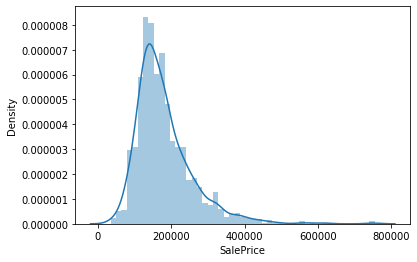

In [66]:
sns.distplot(prices[DEPENDENT_VARIABLE])

<font color='green'>
    The target variable is right skewed. This is due to some of the outliers for the highly priced datapoints.
</font>

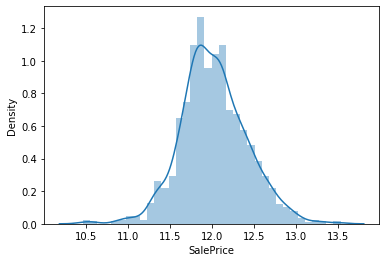

In [67]:
sns.distplot(np.log(prices[DEPENDENT_VARIABLE]))

<font color='green'>
    Doing a log transformation of the target variable is giving a normal distribution and this can be applied. 
</font>

## Transform target variable to get a normal distribution

In [68]:
prices[DEPENDENT_VARIABLE] = np.log(prices[DEPENDENT_VARIABLE])

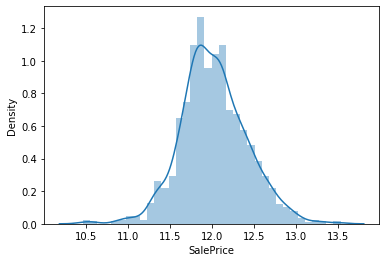

In [69]:
sns.distplot(prices[DEPENDENT_VARIABLE])

# Univariate & Bivariate Analysis

## Univariate Analysis

### Categorical Variables - Univariate Analysis


------------------ Variable: MSZoning ------------------- 



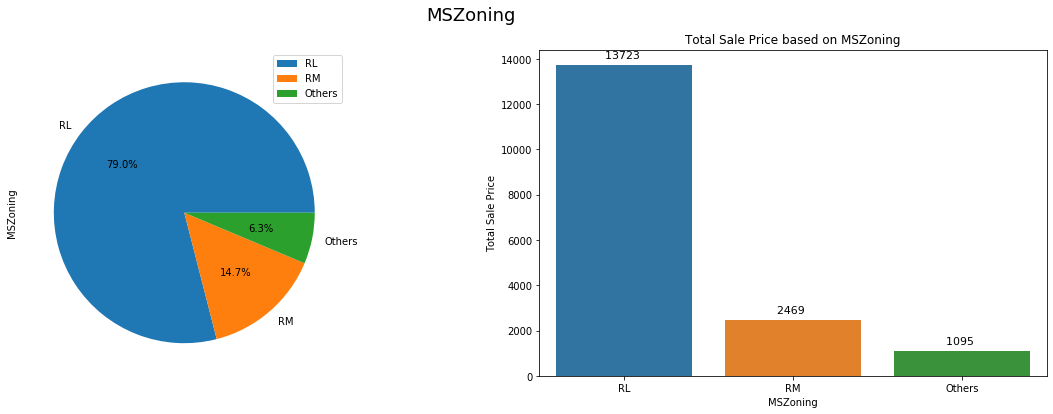


------------------ Variable: LotConfig ------------------- 



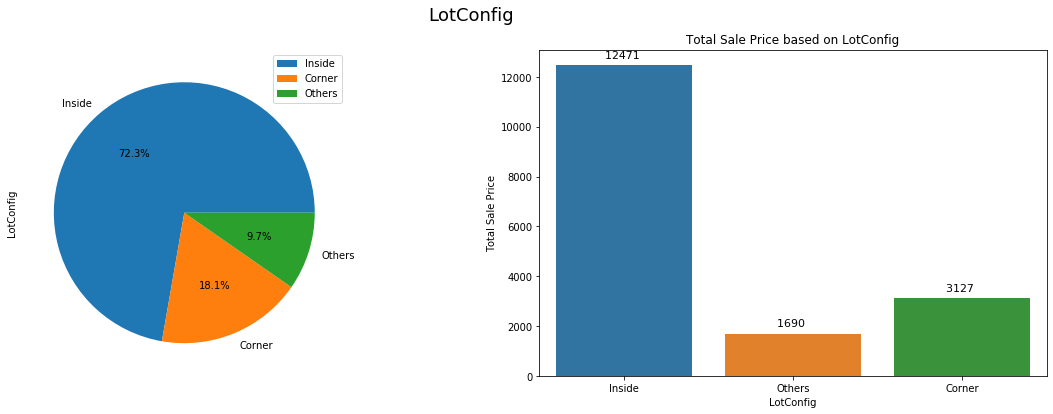


------------------ Variable: BldgType ------------------- 



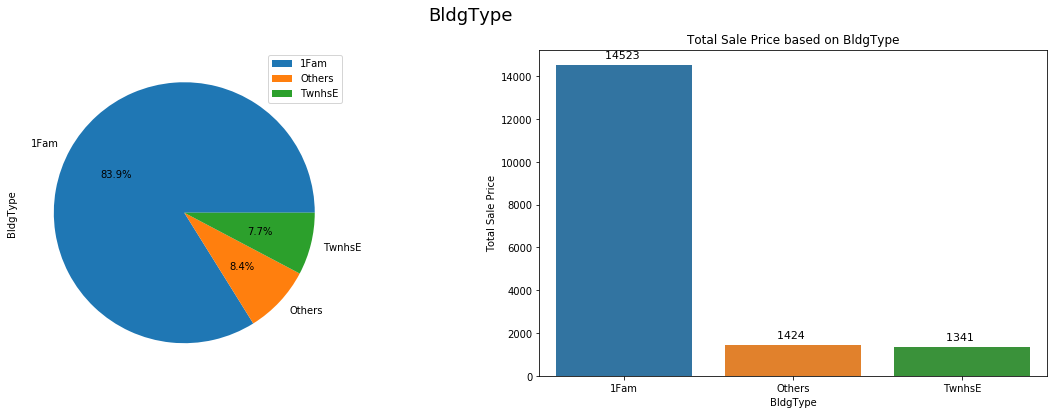


------------------ Variable: HouseStyle ------------------- 



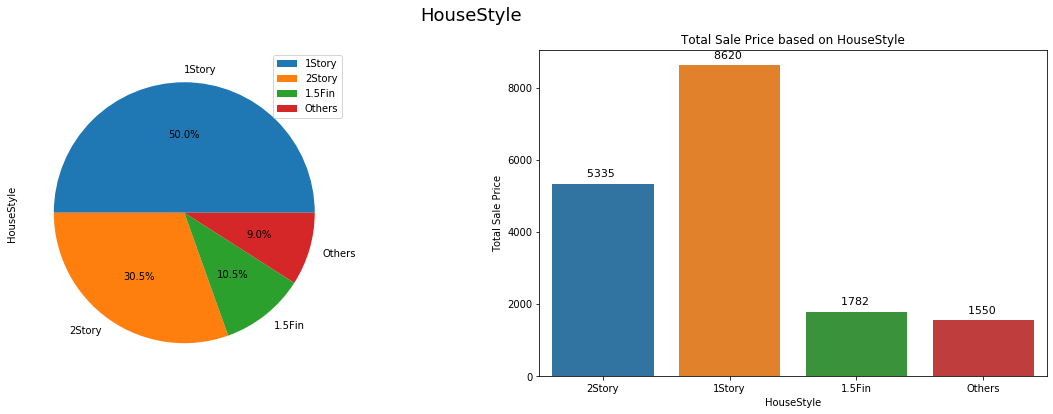


------------------ Variable: RoofStyle ------------------- 



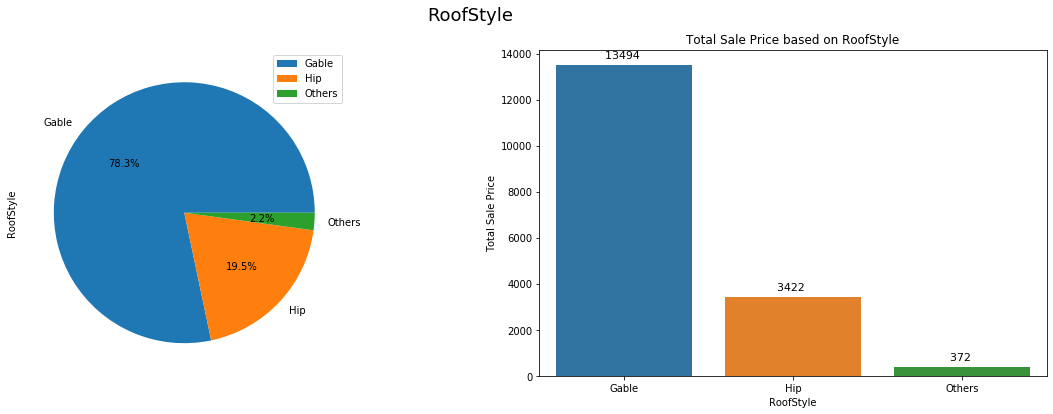


------------------ Variable: Exterior1st ------------------- 



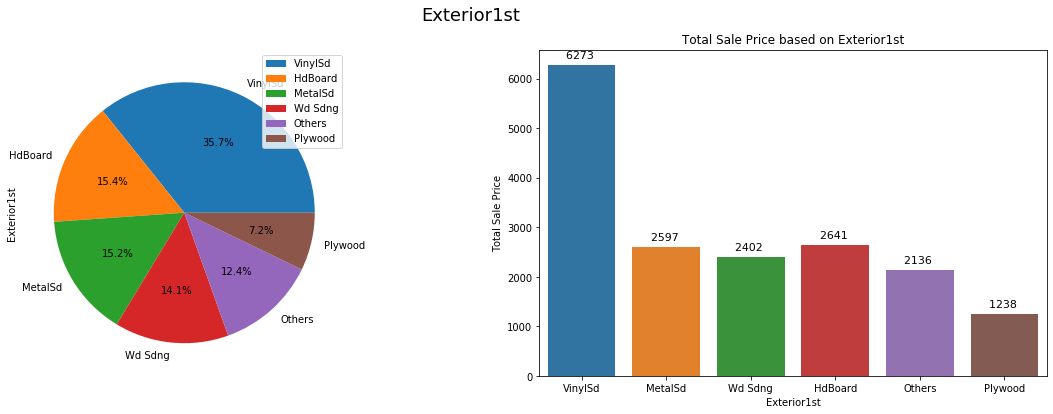


------------------ Variable: Exterior2nd ------------------- 



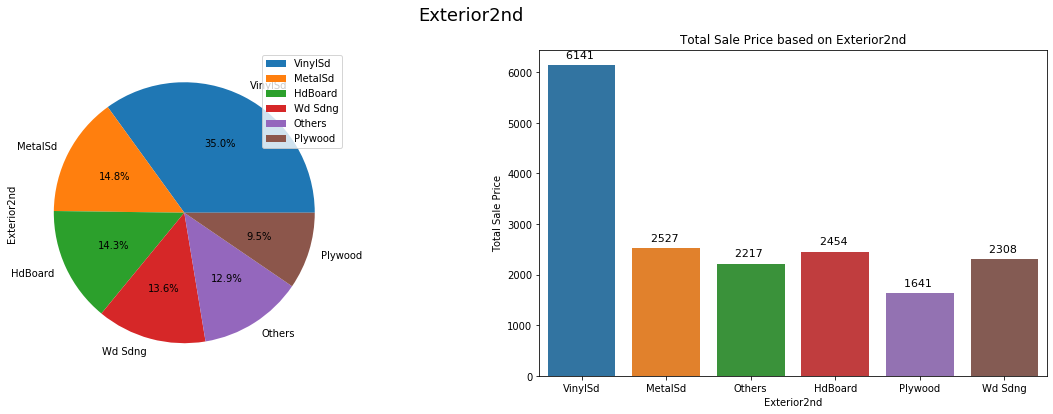


------------------ Variable: MasVnrType ------------------- 



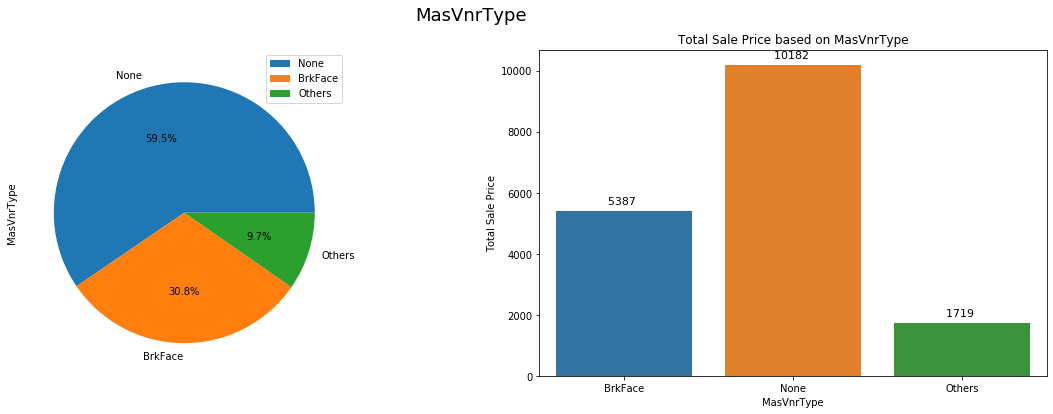


------------------ Variable: Foundation ------------------- 



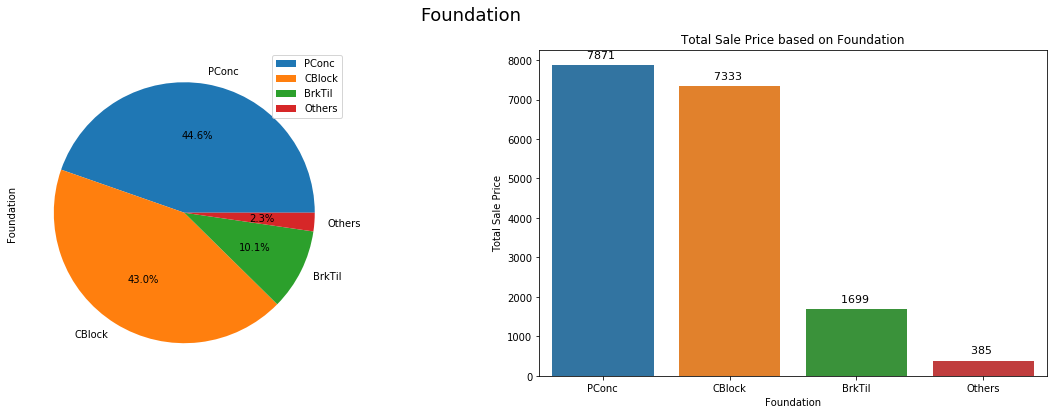


------------------ Variable: GarageType ------------------- 



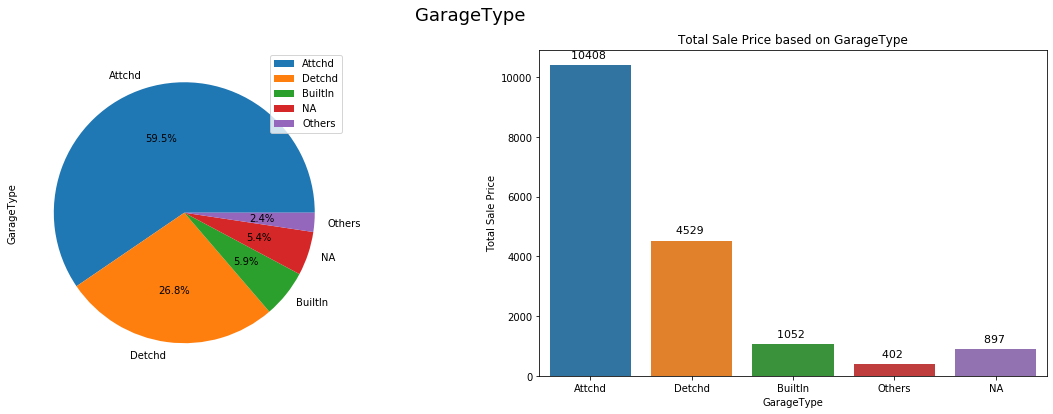

In [70]:
# For each categorical variable, plot
# 1. Percentage distribution of each category - Univariate Analysis
# 2. Bar chart to show the total sales price for each category - Segmented Univariate Analysis 


for col in ALL_CATEGORICAL_COLUMNS:
    
    print(f'\n------------------ Variable: {col} ------------------- \n')
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    # Chart 1
    prices[col].value_counts().plot.pie(ax=ax[0], autopct="%1.1f%%")
    ax[0].legend()
    # Chart 2
    group_df = pd.DataFrame(prices.groupby([col],sort=False)[DEPENDENT_VARIABLE].sum())
    sns.barplot(x=group_df.index, y=group_df[DEPENDENT_VARIABLE], ax=ax[1])


    ax[1].set(xlabel=col, ylabel='Total Sale Price',title = f'Total Sale Price based on {col}') 

    #annotate axis = seaborn axis
    for p in ax[1].patches:
                 ax[1].annotate("%.0f " % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11,  xytext=(0, 10),
                     textcoords='offset points')
        
    
    plt.yticks(rotation = 0)
    plt.show()

### Continuous Variables - Univariate Analysis


------------------ Variable: LotArea ------------------- 



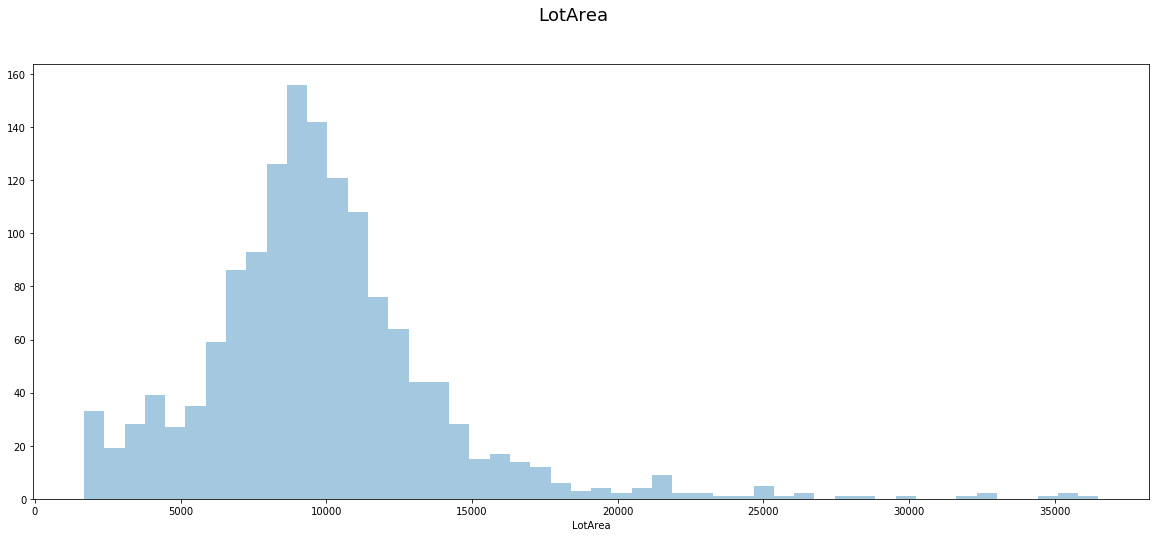


------------------ Variable: GarageArea ------------------- 



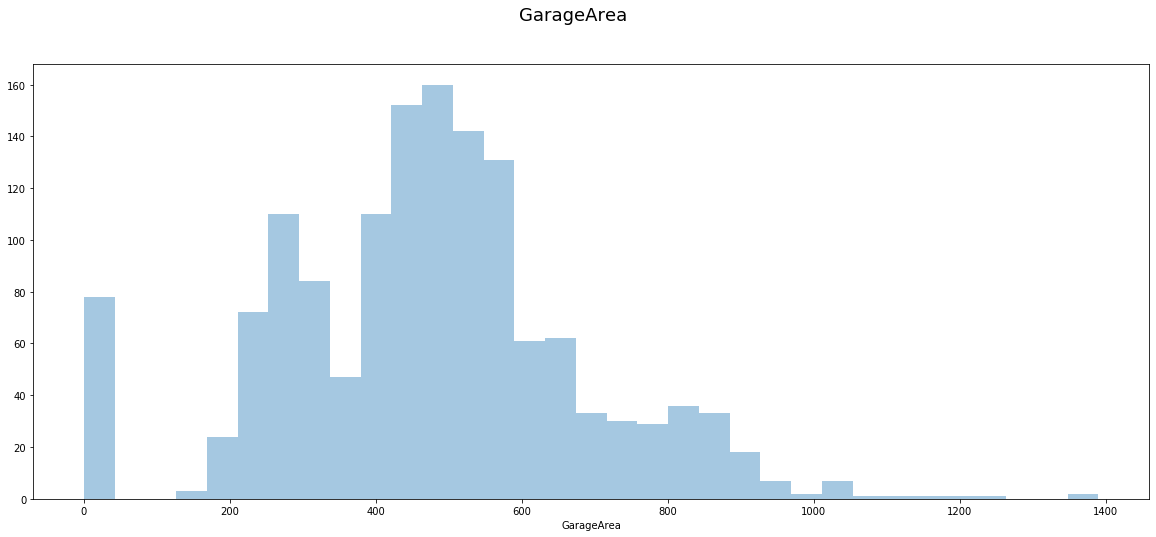


------------------ Variable: LotFrontage ------------------- 



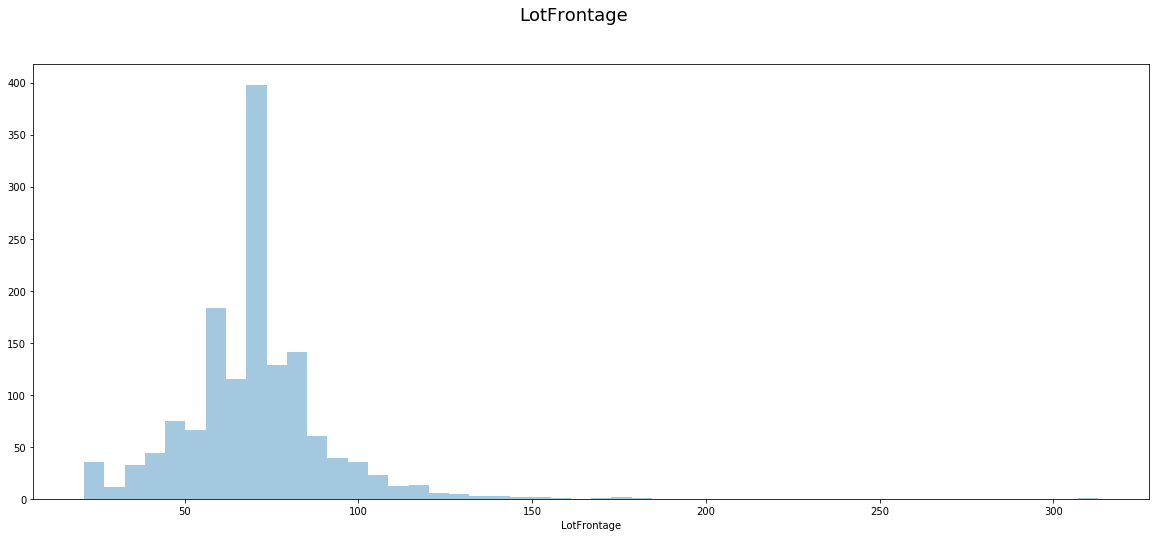


------------------ Variable: YearBuilt_num_years ------------------- 



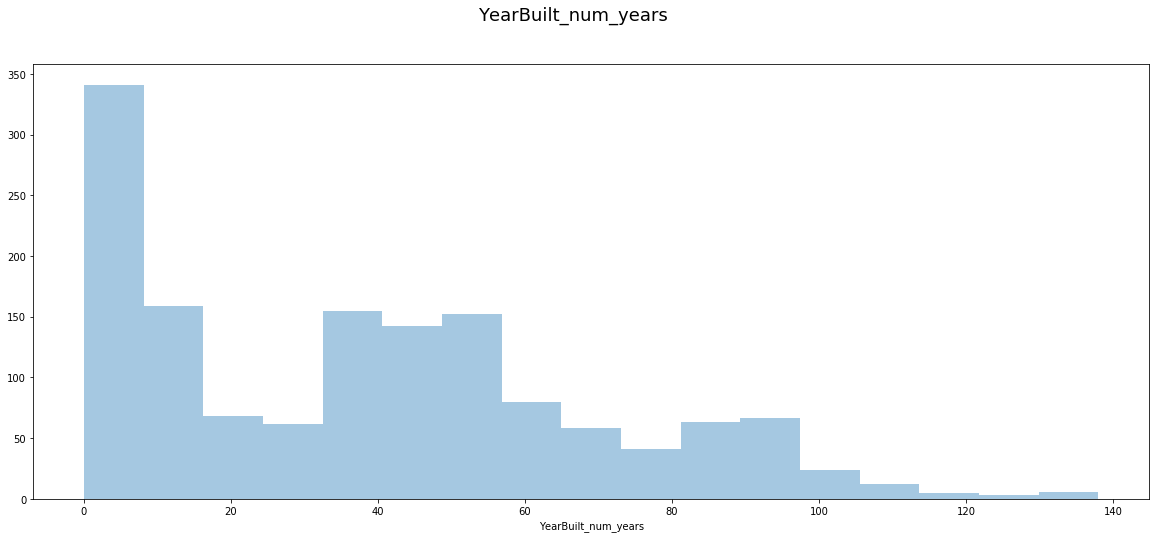


------------------ Variable: YearRemodAdd_num_years ------------------- 



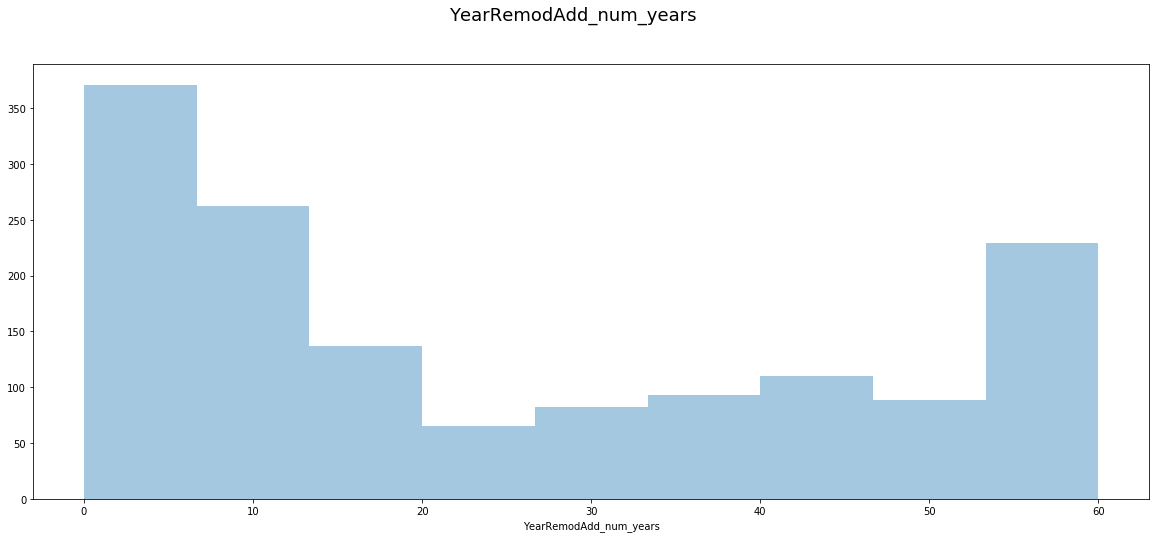

In [71]:
# Check the distribution for specific continuous variables
for col in NUMERICAL_ANALYSIS_COLUMNS:
    print(f'\n------------------ Variable: {col} ------------------- \n')
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    fig.suptitle(col, fontsize=18)
    sns.distplot(prices[col], kde=False)
    plt.show()


## Bivariate Analysis - heat map

In [72]:
corrdf = prices[ALL_NUMERICAL_COLUMNS]

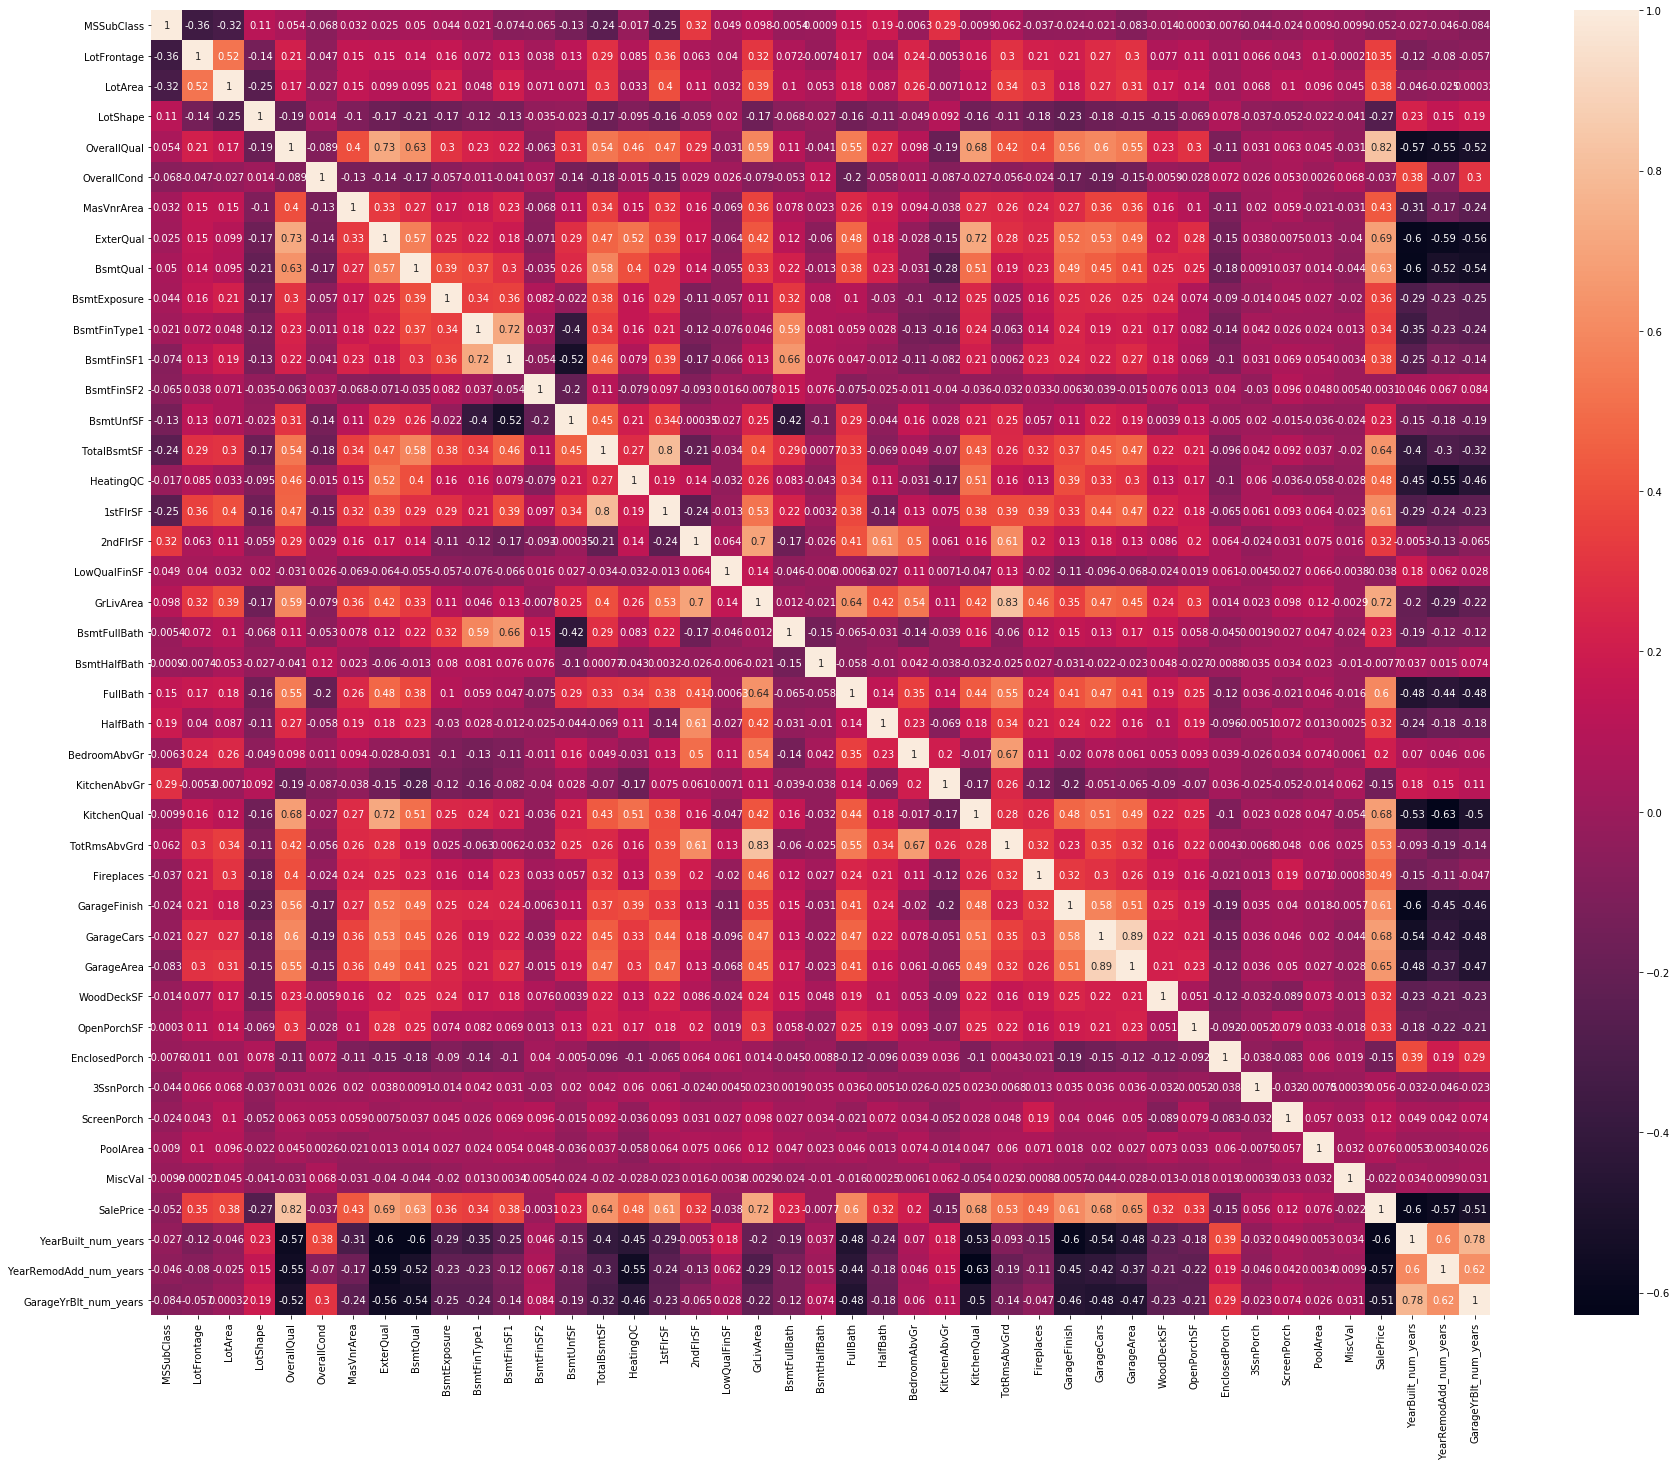

In [73]:
# Heat Map
fig, ax = plt.subplots(figsize=(30, 24))
corr = corrdf.corr() 
sns.heatmap(corr, annot=True)

- There is multicollinearity in the data as seen with the dark patches <br>
- Some of the variables are highly correlated with the sales price, like OverallQual, ExterQual etc

# Create dummy variables

In [74]:
prices.shape

(1438, 53)

In [75]:
# Create dummy variables, drop first & concatenate to original dataframe
dummies = pd.get_dummies(prices[ALL_CATEGORICAL_COLUMNS],drop_first=True)
prices = pd.concat([prices,dummies],axis=1)
# Drop the categorical columns after creating the dummies
prices.drop(ALL_CATEGORICAL_COLUMNS,axis=1,inplace=True)
prices.shape

(1438, 73)

In [76]:
# Create X & y variables

In [77]:
X = prices.drop([DEPENDENT_VARIABLE],axis=1)
y = prices[DEPENDENT_VARIABLE]

# Remove multicollinearity - using VIF

Some of the variables in the dataset are directly derived from the other variables. <br>
Like the basement area variables are added and present as total basement area (TotalBasmtSF). <br> 
Some collinearity can be removed from the data before we start with the modelling.<br>

In [78]:
print_vif(X)

,Features,VIF
18,LowQualFinSF,inf
11,BsmtFinSF1,inf
17,2ndFlrSF,inf
16,1stFlrSF,inf
14,TotalBsmtSF,inf
13,BsmtUnfSF,inf
12,BsmtFinSF2,inf
19,GrLivArea,inf
27,TotRmsAbvGrd,90.33000
4,OverallQual,82.25000


## Handle multicollinearity in the basement area variables

In [79]:
X[['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head()

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856,706,0,150
1,1262,978,0,284
2,920,486,0,434
3,756,216,0,540
4,1145,655,0,490


In [80]:
# TotalBsmtSF is sum of 'BsmtFinSF1','BsmtUnfSF','BsmtFinSF2'. Hence we can keep only the total basement area column
X.drop(['BsmtFinSF1','BsmtUnfSF','BsmtFinSF2'],inplace = True, axis = 1)
print_vif(X)

,Features,VIF
16,GrLivArea,inf
15,LowQualFinSF,inf
14,2ndFlrSF,inf
13,1stFlrSF,inf
24,TotRmsAbvGrd,90.12000
4,OverallQual,82.02000
7,ExterQual,58.84000
8,BsmtQual,56.76000
53,Exterior1st_VinylSd,52.00000
58,Exterior2nd_VinylSd,51.83000


## Handle multicollinearity in the living area variables¶

In [81]:
X[['GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF']].head()

,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF
0,1710,0,854,856
1,1262,0,0,1262
2,1786,0,866,920
3,1717,0,756,961
4,2198,0,1053,1145


In [82]:
# GrLivArea is sum of 'LowQualFinSF','2ndFlrSF','1stFlrSF'. Hence we can keep only the total ground living area column

X.drop(['LowQualFinSF','2ndFlrSF','1stFlrSF'],inplace = True, axis = 1)
print_vif(X)

,Features,VIF
21,TotRmsAbvGrd,89.34000
4,OverallQual,81.95000
13,GrLivArea,81.25000
7,ExterQual,58.82000
8,BsmtQual,54.43000
50,Exterior1st_VinylSd,51.96000
55,Exterior2nd_VinylSd,51.78000
19,KitchenAbvGr,50.25000
5,OverallCond,45.14000
24,GarageCars,43.29000


In [83]:
X.shape

(1438, 66)

# Train-Test Split

In [84]:
# 70% of data used as train data and the remaining 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1006, 66)
(432, 66)
(1006,)
(432,)


# Scale the data

In [86]:
# Scale all columns in the data using MinMaxScaler
scaler = MinMaxScaler()
scale_cols = X_train.columns  
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [87]:
# Use the scaler run on the training data to scale the test data 
# min & max values of train dataset should be used in the test data
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# Set the scoring parameter - LASSO & RIDGE

In [88]:
score_param = 'neg_mean_absolute_error'
#score_param= 'r2'

# ITERATION 1: Build models with ALL features

In the first iteration let us consider all the variables in the dataset to build the different models. <br>
In this case, following four models are built:
1. Linear Regression - using statsmodel
2. Linear Regression - using sklearn
3. Ridge Regression
4. Lasso Regression

## Linear Regression - statsmodel - all features

In [89]:
X_train_lm = X_train.copy()
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:04:48   Log-Likelihood:                 755.96
No. Observations:                1006   AIC:                            -1378.
Df Residuals:                     939   BIC:                            -1049.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

In [90]:
# Predict on the test data using statsmodel
X_test_stat = sm.add_constant(X_test[X_train_lm.columns])
y_test_pred = sm_model.predict(X_test_stat)

# Predict on the train data using statsmodel
y_train_pred = sm_model.predict(sm.add_constant(X_train_lm))

R2 - train: 0.9128944321174396
R2 - test: 0.9007286781543787
RSS - train: 13.1046344697207
RSS - test: 7.4013902812448995
MSE - train: 0.013026475616024553, RMSE = 0.11413358671322195
MSE - test: 0.01713284787325208, RMSE = 0.13089250503085378


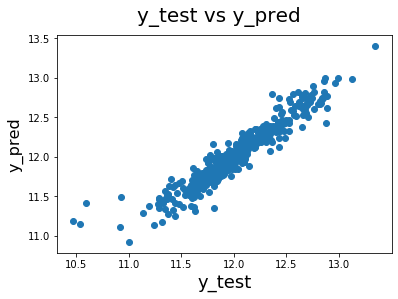

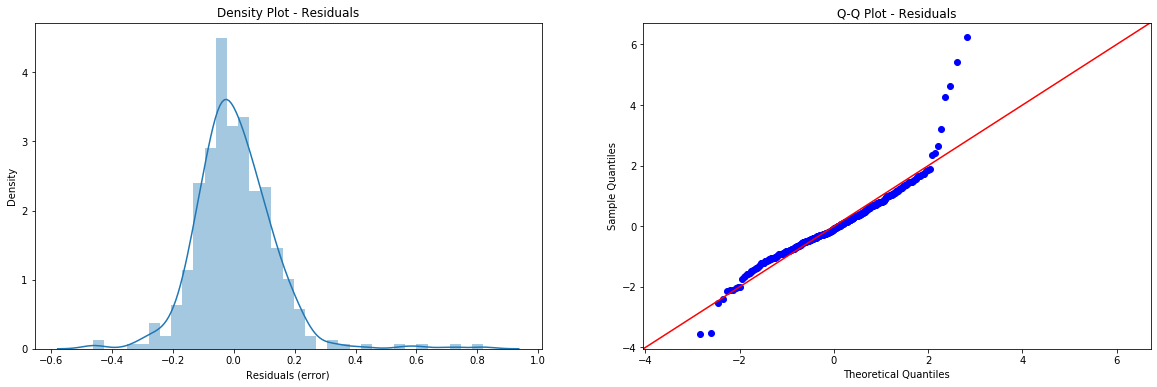

In [91]:
metric_lr_stat_all = print_metrics(y_train, y_test, y_train_pred,y_test_pred)

print_pred_plot(y_test, y_test_pred)


## Linear Regression - sklearn - all features

In [92]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Print the coefficients and intercept
print(lm.intercept_)
#print(lm.coef_)

10.828272579387932


R2 - train: 0.9128944321174395
R2 - test: 0.9007286781543792
RSS - train: 13.104634469720718
RSS - test: 7.401390281244866
MSE - train: 0.01302647561602457, RMSE = 0.11413358671322202
MSE - test: 0.017132847873252005, RMSE = 0.13089250503085348


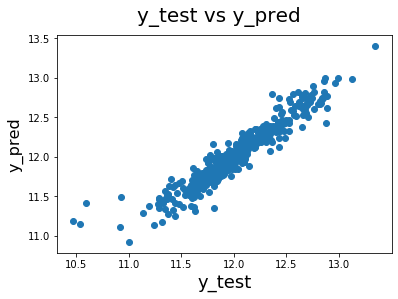

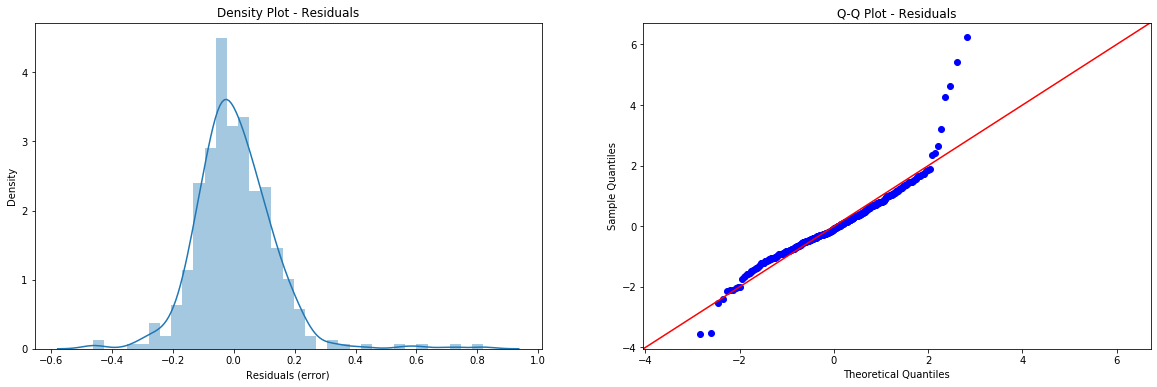

In [94]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lr_all = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Ridge Regression - all features

In [95]:
# list of alphas to tune  
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

In [96]:
ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = score_param,  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [97]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.5}


In [98]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 - train: 0.9123926488704509
R2 - test: 0.9015805764977253
RSS - train: 13.180125465241014
RSS - test: 7.337875139088747
MSE - train: 0.013101516367038782, RMSE = 0.1144618555110775
MSE - test: 0.016985822081223952, RMSE = 0.13032966692669767


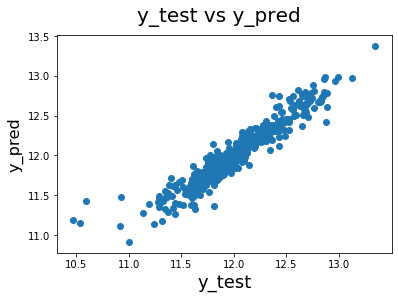

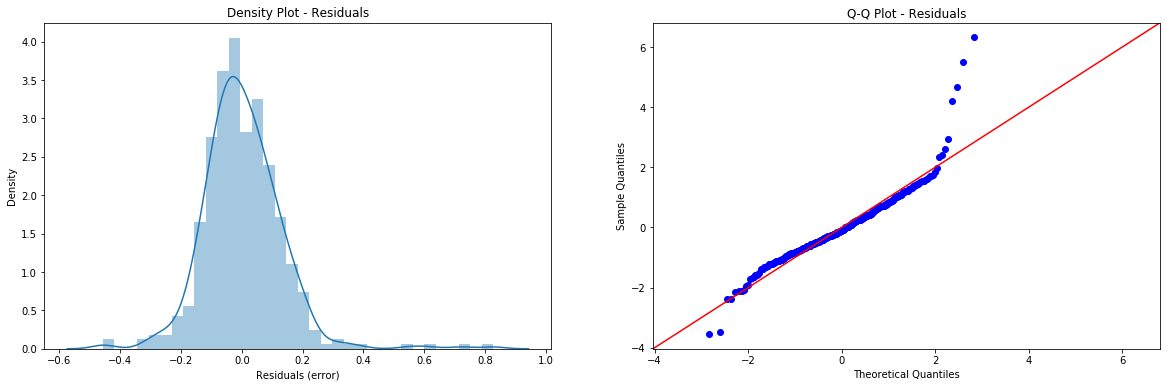

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


metric_ridge_all = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Lasso Regression - all features

In [100]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = score_param, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [102]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
#lasso.coef_

R2 - train: 0.912626937806907
R2 - test: 0.9030389058215356
RSS - train: 13.144877765843715
RSS - test: 7.229146210296104
MSE - train: 0.013066478892488782, RMSE = 0.11430869998599749
MSE - test: 0.016734134746055798, RMSE = 0.12936048371143252


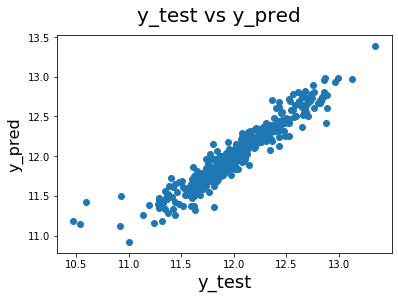

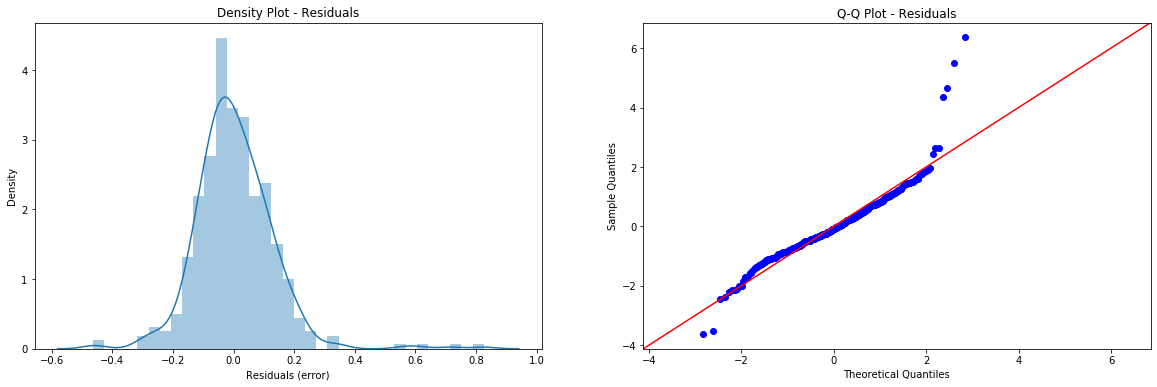

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


metric_lasso_all = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Comparing Metrics - LR, Ridge, Lasso - all features

In [105]:
compare_model_metrics(metric_lr_all, metric_ridge_all, metric_lasso_all)



,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.91289,0.91239,0.91263
1,R2 Score (Test),0.90073,0.90158,0.90304
2,RSS (Train),13.10463,13.18013,13.14488
3,RSS (Test),7.40139,7.33788,7.22915
4,MSE (Train),0.11413,0.11446,0.11431
5,MSE (Test),0.13089,0.13033,0.12936


## Creating a table which contain all the co-efficients

In [106]:
compare_model_coeff(X_train.columns, lm.coef_,ridge.coef_,lasso.coef_)

,Linear,Ridge,Lasso
MSSubClass,0.00302,-0.00115,-0.00000
LotFrontage,0.10930,0.10345,0.08112
LotArea,0.16817,0.16795,0.16568
LotShape,-0.00045,-0.00204,-0.00000
OverallQual,0.50735,0.49753,0.51274
OverallCond,0.42696,0.39915,0.41569
MasVnrArea,0.09828,0.10671,0.07970
ExterQual,0.03384,0.04387,0.03489
BsmtQual,0.00610,0.01639,0.01297
BsmtExposure,0.06801,0.07051,0.06875


# ITERATION 2: Top 50 features by RFE

## RFE - get top 50 features

In [107]:
# Part of sklearn package. Requires a model object. 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)    
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe_df = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns = ['Feature','Selected','Ranking'])
rfe_df.sort_values(by=['Ranking'])

,Feature,Selected,Ranking
32,MiscVal,True,1
29,3SsnPorch,True,1
30,ScreenPorch,True,1
31,PoolArea,True,1
64,GarageType_NA,True,1
33,YearBuilt_num_years,True,1
34,YearRemodAdd_num_years,True,1
35,GarageYrBlt_num_years,True,1
37,MSZoning_RM,True,1
39,LotConfig_Others,True,1


In [109]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_num_years', 'YearRemodAdd_num_years',
       'GarageYrBlt_num_years', 'MSZoning_RM', 'LotConfig_Others',
       'BldgType_TwnhsE', 'RoofStyle_Others', 'Exterior1st_MetalSd',
       'Exterior1st_Others', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_Others', 'Exterior2nd_Wd Sdng', 'MasVnrType_None',
       'MasVnrType_Others', 'Foundation_CBlock', 'Foundation_Others',
       'Foundation_PConc', 'GarageType_BuiltIn', 'GarageType_NA',
       'GarageType_Others'],
      dtype='object')

In [110]:
X_train_rfe_50 = X_train[rfe_cols]
X_test_rfe_50 = X_test[rfe_cols]

## Linear Regression - 50 features

R2 - train: 0.9127719962053757
R2 - test: 0.9000570028158584
RSS - train: 13.123054392953716
RSS - test: 7.45146850353761
MSE - train: 0.013044785678880432, RMSE = 0.11421377184420639
MSE - test: 0.01724876968411484, RMSE = 0.13133457154959177


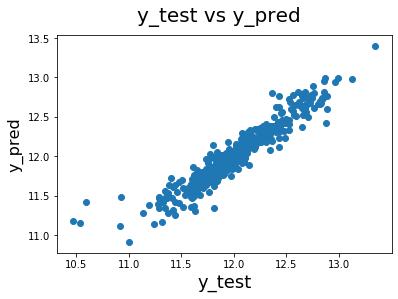

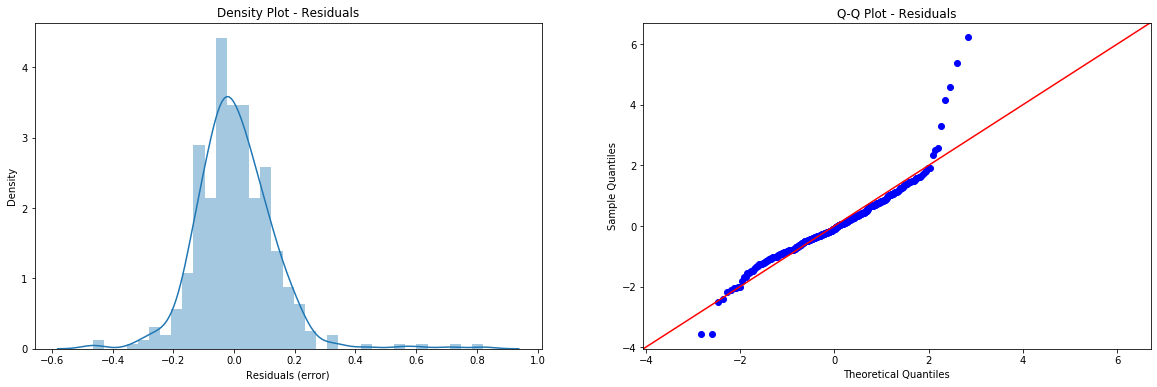

In [111]:
lm = LinearRegression()
lm.fit(X_train_rfe_50, y_train)

y_pred_train = lm.predict(X_train_rfe_50)
y_pred_test = lm.predict(X_test_rfe_50)

metric_lr_rfe_50 = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Ridge Regression - 50 features

In [112]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = score_param,  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe_50, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.4}


In [114]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe_50, y_train)
#print(ridge.coef_)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 - train: 0.9124648057402186
R2 - test: 0.9006061005835408
RSS - train: 13.16926979406211
RSS - test: 7.410529319837629
MSE - train: 0.013090725441413629, RMSE = 0.1144147081515905
MSE - test: 0.017154003055179695, RMSE = 0.13097329138102812


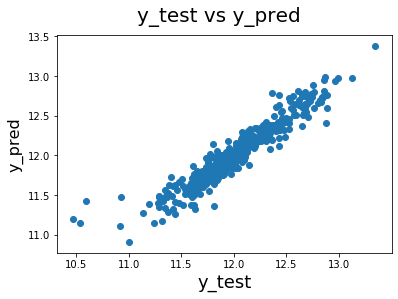

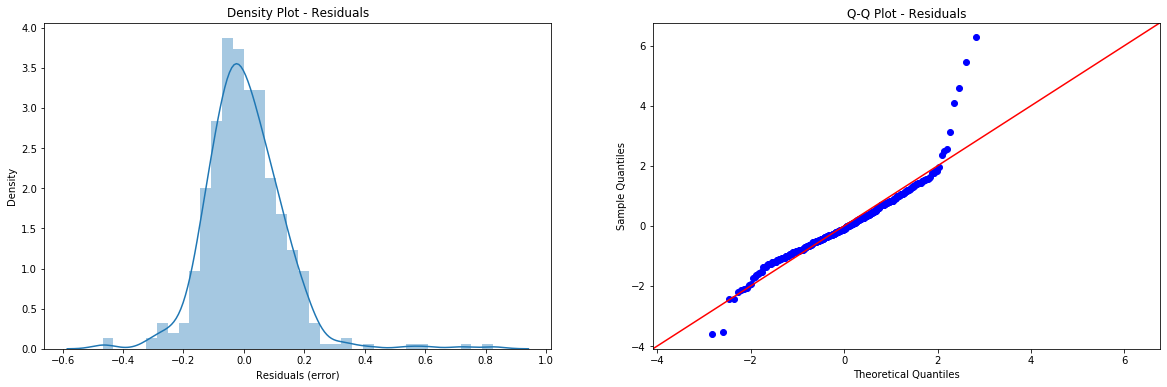

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe_50)
y_pred_test = ridge.predict(X_test_rfe_50)


metric_ridge_rfe_50 = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Lasso Regression - 50 features

In [116]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = score_param, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe_50, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [117]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [118]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe_50, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [119]:
lasso.coef_

array([ 1.00924298e-01,  1.71381077e-01,  5.13776788e-01,  4.17439319e-01,
        8.09860027e-02,  3.69624006e-02,  6.48957287e-02,  5.70413471e-02,
        3.97001573e-01,  4.30623739e-02,  9.69748781e-01,  1.17942494e-01,
        1.05546827e-03,  3.98977067e-02,  1.94129337e-02, -1.02251981e-01,
       -1.69392334e-01,  6.90450989e-02,  1.57603282e-01,  9.01760843e-02,
        1.07645069e-01,  1.42880230e-01,  3.14190852e-02,  2.06182897e-03,
        3.97305894e-02,  8.16434911e-04,  1.35314575e-01,  4.34605639e-02,
       -0.00000000e+00, -3.15417867e-01, -3.06354348e-02,  4.60534589e-02,
       -8.26194675e-02,  1.29785643e-02,  4.70764404e-03, -4.62800679e-02,
        1.50006633e-02,  3.25946270e-02, -3.51285750e-02,  1.16025050e-02,
       -1.73615164e-02,  4.09172972e-02,  1.47732539e-02,  3.70610673e-02,
       -2.45305804e-02, -0.00000000e+00,  2.72064939e-02,  1.95642594e-02,
       -4.46408131e-02, -6.61088420e-02])

R2 - train: 0.9125337322998324
R2 - test: 0.9020711242789861
RSS - train: 13.158900108277944
RSS - test: 7.301301277542351
MSE - train: 0.013080417602661973, RMSE = 0.11436965332928999
MSE - test: 0.01690116036468137, RMSE = 0.13000446286447773


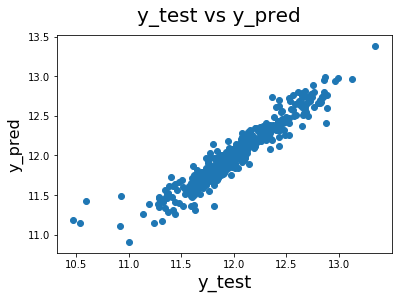

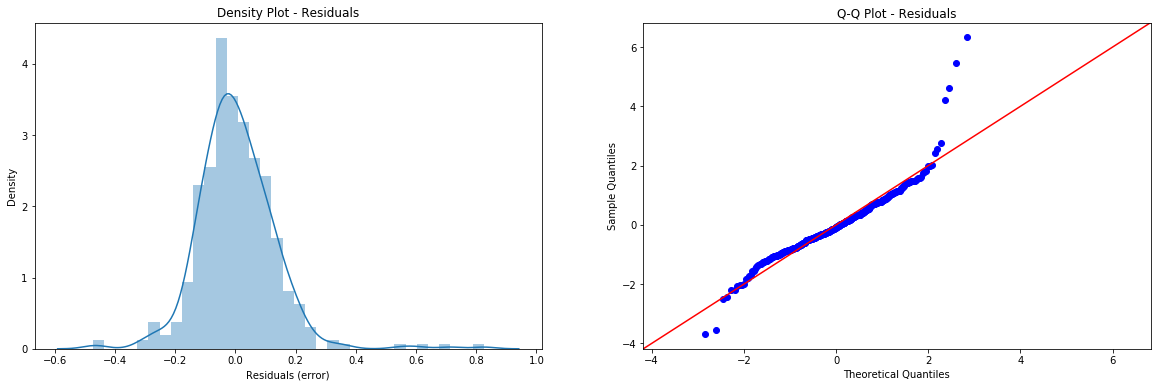

In [120]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe_50)
y_pred_test = lasso.predict(X_test_rfe_50)


metric_lasso_rfe_50 = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Comparing Metrics - LR, Ridge, Lasso - rfe - 50 features

In [121]:
compare_model_metrics(metric_lr_rfe_50, metric_ridge_rfe_50, metric_lasso_rfe_50)


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.91277,0.91246,0.91253
1,R2 Score (Test),0.90006,0.90061,0.90207
2,RSS (Train),13.12305,13.16927,13.15890
3,RSS (Test),7.45147,7.41053,7.30130
4,MSE (Train),0.11421,0.11441,0.11437
5,MSE (Test),0.13133,0.13097,0.13000


## Creating a table which contain all the co-efficients

In [122]:
compare_model_coeff(X_train_rfe_50.columns, lm.coef_,ridge.coef_,lasso.coef_)


,Linear,Ridge,Lasso
LotFrontage,0.12153,0.12038,0.10092
LotArea,0.17249,0.17396,0.17138
OverallQual,0.50781,0.50300,0.51378
OverallCond,0.42779,0.40599,0.41744
MasVnrArea,0.09921,0.10664,0.08099
ExterQual,0.03527,0.04369,0.03696
BsmtExposure,0.06445,0.06713,0.06490
BsmtFinType1,0.05401,0.05737,0.05704
TotalBsmtSF,0.39439,0.39931,0.39700
HeatingQC,0.04285,0.04641,0.04306


<font color='green'>
<b>OBSERVATIONS:</b> <br>
    - Model performs well with 50 features (similar to all features) <br>
    - Some of the co-efficients from LASSO is 0, indicating that further feature engineering is possible <br>
    - Let us try to build the models with 30 features to see how the models perform <br>

</font>

# ITERATION 3: Top 30 features by RFE

## RFE - get top 30 features

In [123]:
# Part of sklearn package. Requires a model object. 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)    
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe_df = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns = ['Feature','Selected','Ranking'])
rfe_df.sort_values(by=['Ranking'])

,Feature,Selected,Ranking
65,GarageType_Others,True,1
51,Exterior1st_Wd Sdng,True,1
37,MSZoning_RM,True,1
56,Exterior2nd_Wd Sdng,True,1
35,GarageYrBlt_num_years,True,1
33,YearBuilt_num_years,True,1
31,PoolArea,True,1
30,ScreenPorch,True,1
25,GarageArea,True,1
24,GarageCars,True,1


In [125]:
rfe_cols_30 = X_train.columns[rfe.support_]
rfe_cols_30

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'ScreenPorch', 'PoolArea', 'YearBuilt_num_years',
       'GarageYrBlt_num_years', 'MSZoning_RM', 'RoofStyle_Others',
       'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Foundation_PConc',
       'GarageType_Others'],
      dtype='object')

In [126]:
X_train_rfe_30 = X_train[rfe_cols_30]
X_test_rfe_30 = X_test[rfe_cols_30]

## Linear Regression - 30 features

0.8995762720727298
0.9097216404463829
R2 - train: 0.9097216404463829
R2 - test: 0.8995762720727298
RSS - train: 13.581966471663787
RSS - test: 7.487310434358484
MSE - train: 0.013500960707419272, RMSE = 0.1161936345391574
MSE - test: 0.017331737116570566, RMSE = 0.13165005551297942


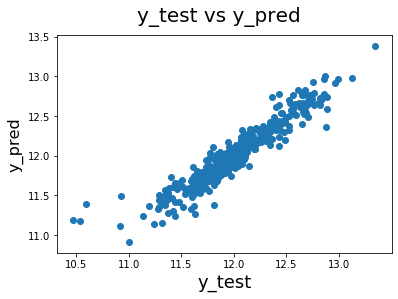

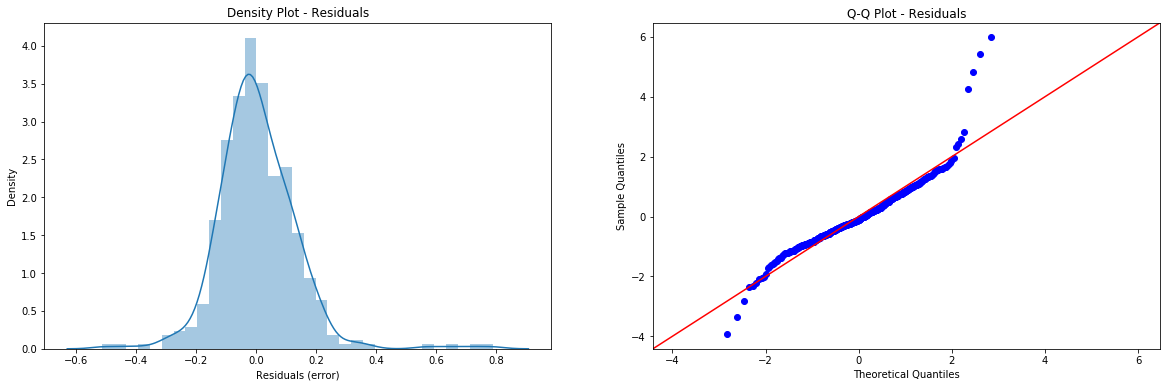

In [127]:
lm = LinearRegression()
lm.fit(X_train_rfe_30, y_train)

y_pred_train = lm.predict(X_train_rfe_30)
y_pred_test = lm.predict(X_test_rfe_30)

# R2-score for predictions from statsmodel
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

metric_lr_rfe = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Ridge Regression - 30 features

In [128]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = score_param,  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe_30, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00250,0.00056,0.00094,0.00014,0.00010,{'alpha': 0.0001},-0.08963,-0.07996,-0.08951,-0.08869,...,-0.08648,0.00375,11,-0.08113,-0.08374,-0.08195,-0.08179,-0.08341,-0.08240,0.00100
1,0.00232,0.00028,0.00097,0.00012,0.00100,{'alpha': 0.001},-0.08963,-0.07996,-0.08951,-0.08869,...,-0.08648,0.00375,10,-0.08113,-0.08374,-0.08195,-0.08179,-0.08341,-0.08240,0.00100
2,0.00204,0.00022,0.00085,0.00011,0.01000,{'alpha': 0.01},-0.08963,-0.07995,-0.08952,-0.08865,...,-0.08647,0.00374,9,-0.08112,-0.08373,-0.08196,-0.08179,-0.08340,-0.08240,0.00100
3,0.00211,0.00027,0.00085,0.00011,0.05000,{'alpha': 0.05},-0.08962,-0.07994,-0.08956,-0.08847,...,-0.08644,0.00373,7,-0.08109,-0.08371,-0.08197,-0.08177,-0.08338,-0.08239,0.00100
4,0.00201,0.00025,0.00084,0.00011,0.10000,{'alpha': 0.1},-0.08960,-0.07993,-0.08962,-0.08826,...,-0.08640,0.00372,5,-0.08106,-0.08369,-0.08199,-0.08177,-0.08337,-0.08238,0.00099


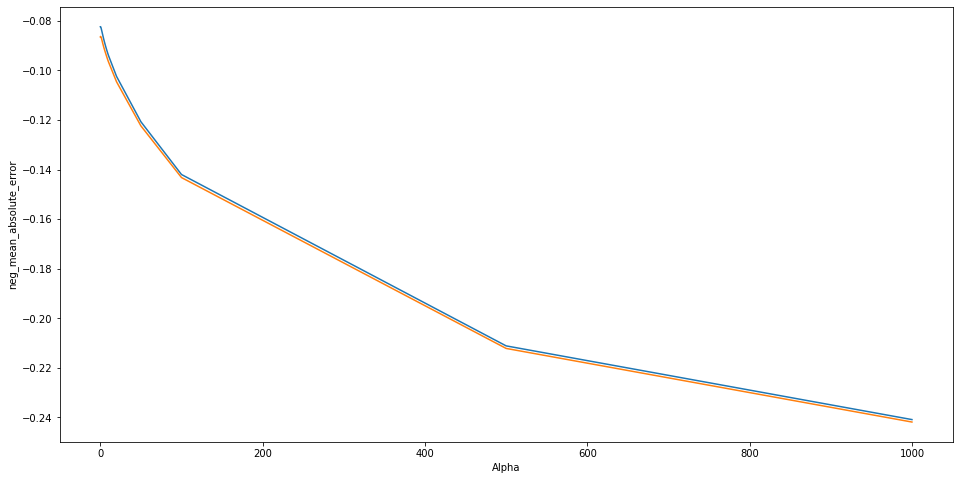

In [129]:
print_alpha_results(model_cv,score_param)

In [130]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.4}


In [131]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe_30, y_train)
#print(ridge.coef_)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 - train: 0.9094442365456188
R2 - test: 0.8992013740056587
RSS - train: 13.62370062033372
RSS - test: 7.515261778800059
MSE - train: 0.013542445944665726, RMSE = 0.11637201529863495
MSE - test: 0.017396439302777914, RMSE = 0.13189556210418119


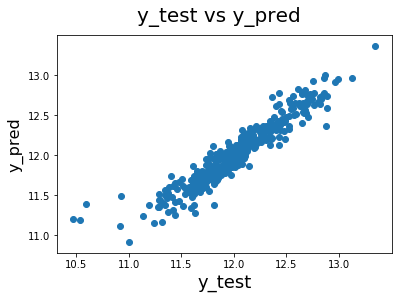

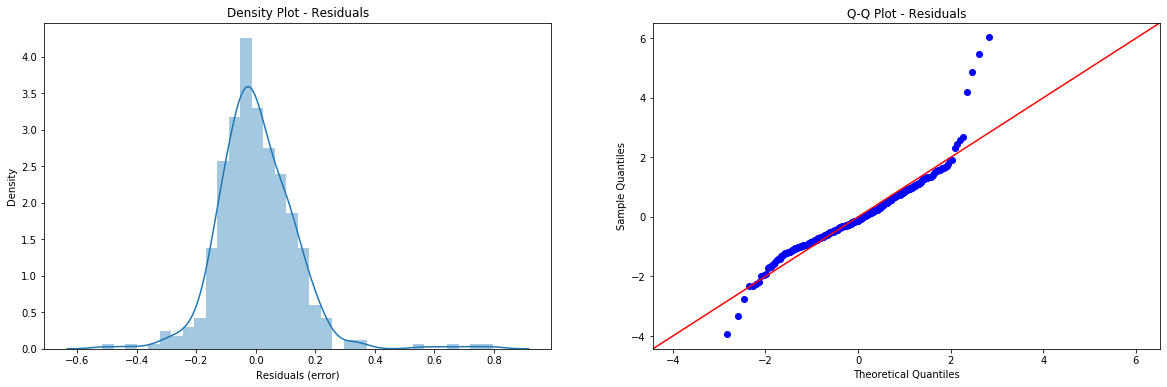

In [132]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe_30)
y_pred_test = ridge.predict(X_test_rfe_30)


metric_ridge_rfe = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Lasso Regression - 30 features

In [133]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        #scoring = score_param, 
                        scoring='r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe_30, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00368,0.00029,0.00133,0.00015,0.00010,{'alpha': 0.0001},0.89772,0.90390,0.89076,0.90580,...,0.90078,0.00582,1,0.91124,0.90991,0.91186,0.90932,0.90928,0.91032,0.00105
1,0.00313,0.00007,0.00124,0.00004,0.00100,{'alpha': 0.001},0.89655,0.89624,0.89314,0.89935,...,0.89660,0.00204,2,0.90627,0.90357,0.90519,0.90230,0.90355,0.90418,0.00139
2,0.00289,0.00001,0.00123,0.00001,0.01000,{'alpha': 0.01},0.84057,0.78815,0.79939,0.77716,...,0.80418,0.02221,3,0.81175,0.81412,0.81341,0.79678,0.81524,0.81026,0.00683
3,0.00264,0.00000,0.00124,0.00003,0.05000,{'alpha': 0.05},0.25157,0.18712,0.21381,0.15492,...,0.20352,0.03191,4,0.18560,0.22049,0.21285,0.21939,0.21624,0.21092,0.01294
4,0.00266,0.00006,0.00121,0.00001,0.10000,{'alpha': 0.1},-0.00031,0.00314,0.01015,-0.02082,...,-0.00012,0.01094,5,0.00000,0.02082,0.01389,0.00000,0.02219,0.01138,0.00971


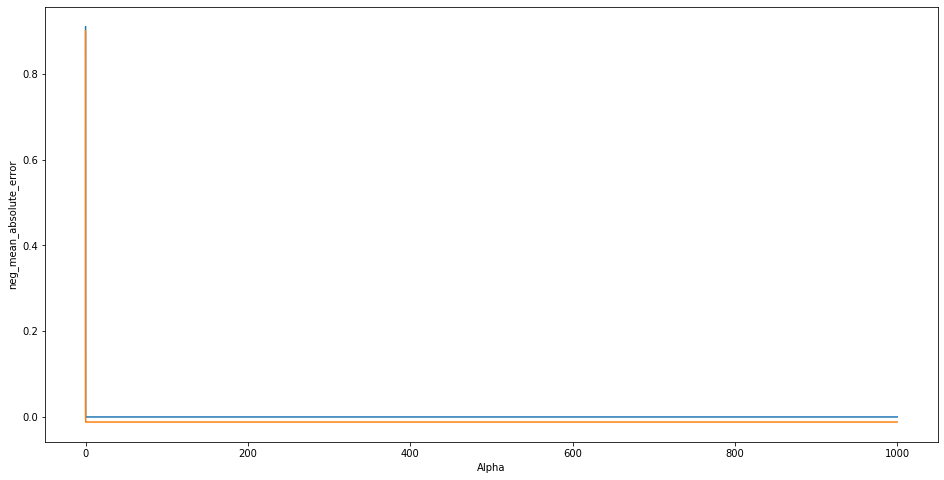

In [134]:
print_alpha_results(model_cv,score_param)

In [135]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [136]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe_30, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
lasso.coef_

array([ 0.05270722,  0.18309086,  0.53155336,  0.43085125,  0.04039688,
        0.05194554,  0.06363866,  0.05203677,  0.3632705 ,  0.0541188 ,
        0.99775553,  0.12599508,  0.04284052, -0.1211009 , -0.20034882,
        0.09022905,  0.1654994 ,  0.09519285,  0.14400999,  0.15539381,
        0.11753637,  0.03437654, -0.30065442,  0.06311336, -0.07873894,
       -0.04744133, -0.0596331 ,  0.05503161,  0.0503301 , -0.06496076])

R2 - train: 0.9095566512726093
R2 - test: 0.9010237239908725
RSS - train: 13.60678833858141
RSS - test: 7.379392494309584
MSE - train: 0.013525634531393051, RMSE = 0.1162997615276706
MSE - test: 0.01708192707016107, RMSE = 0.13069784646336402


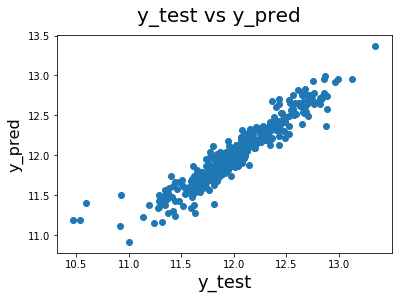

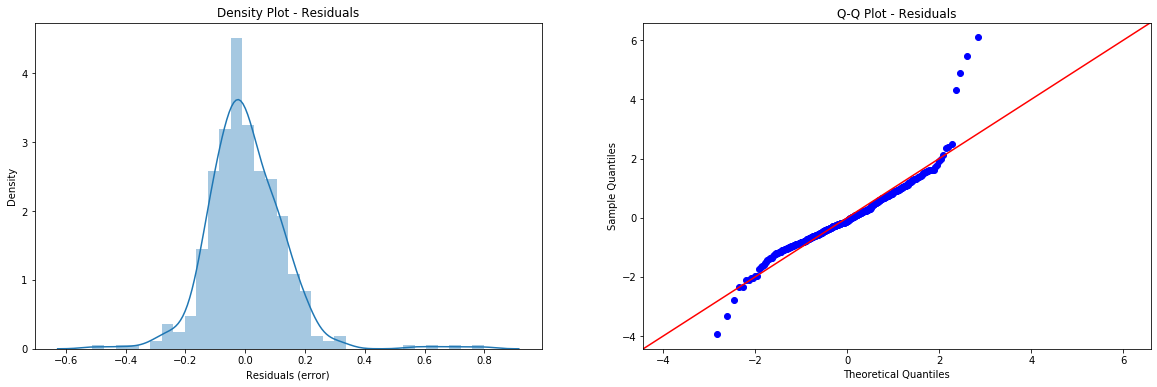

In [138]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe_30)
y_pred_test = lasso.predict(X_test_rfe_30)


metric_lasso_rfe = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Comparing Metrics - LR, Ridge, Lasso - rfe - 30

In [139]:
compare_model_metrics(metric_lr_rfe, metric_ridge_rfe, metric_lasso_rfe)


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.90972,0.90944,0.90956
1,R2 Score (Test),0.89958,0.89920,0.90102
2,RSS (Train),13.58197,13.62370,13.60679
3,RSS (Test),7.48731,7.51526,7.37939
4,MSE (Train),0.11619,0.11637,0.11630
5,MSE (Test),0.13165,0.13190,0.13070


## Creating a table which contain all the co-efficients

In [140]:
compare_model_coeff(X_train_rfe_30.columns, lm.coef_,ridge.coef_,lasso.coef_)
 

,Linear,Ridge,Lasso
LotFrontage,0.06733,0.06800,0.05271
LotArea,0.18655,0.18793,0.18309
OverallQual,0.52722,0.52161,0.53155
OverallCond,0.43840,0.42176,0.43085
MasVnrArea,0.04769,0.05946,0.04040
ExterQual,0.05068,0.05941,0.05195
BsmtExposure,0.06362,0.06501,0.06364
BsmtFinType1,0.04999,0.05366,0.05204
TotalBsmtSF,0.36277,0.35736,0.36327
HeatingQC,0.05443,0.05792,0.05412


<font color='green'>
<b>OBSERVATIONS:</b> <br>
    - Model performs well with 30 features as well <br>
    - Before continuing with these set of features, we can check once on how the model performs with a degree 2 polynomial <br>
</font>

# ITERATION 4: Polynomial Linear Regression

Check if polynomial linear regression of degree 2 gives any improvement in the model performance

In [141]:
# Building the polynomial regression model with degree 2
degree=2 
polyreg = PolynomialFeatures(degree)
X_train_poly = polyreg.fit_transform(X_train_rfe_30) # Transform the variable X to 1, X, X^2
X_test_poly = polyreg.fit_transform(X_test_rfe_30)
print(f'Train Data Size:{X_train_poly.shape}')

Train Data Size:(1006, 496)


## Linear Regression - Polynomial

R2 - train: 0.9596336791342046
R2 - test: -4.0585226207815873e+20
RSS - train: 6.072928432622254
RSS - test: 3.025920207688902e+22
MSE - train: 0.006036708183521127, RMSE = 0.07769625591700753
MSE - test: 7.0044449252057915e+19, RMSE = 8369256194.672135


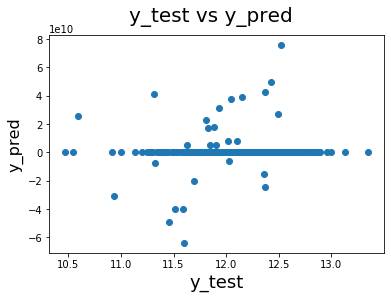

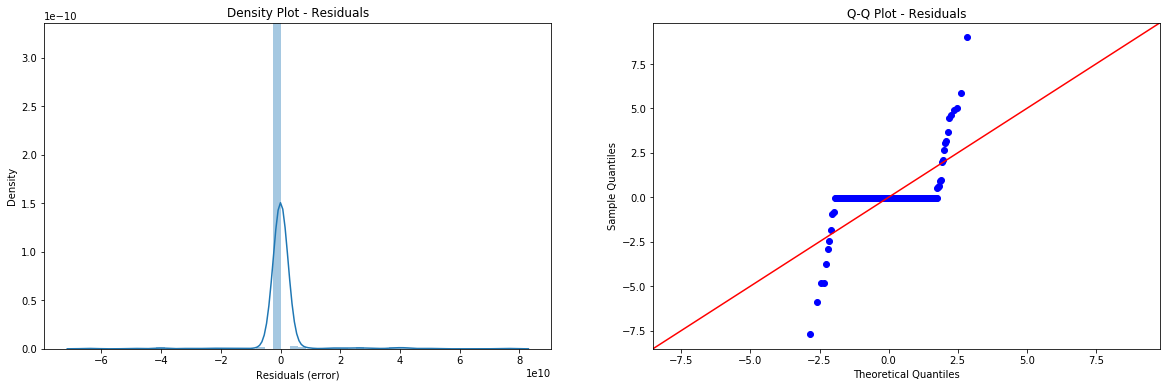

In [142]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

y_pred_train = lm.predict(X_train_poly)
y_pred_test = lm.predict(X_test_poly)

metric_lr_poly = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)

## Ridge Regression - Polynomial - 30 features

In [143]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = score_param,  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_poly, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [144]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [145]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_poly, y_train)
#print(ridge.coef_)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 - train: 0.9313290439668435
R2 - test: 0.8954298003135377
RSS - train: 10.331231394003131
RSS - test: 7.796459695286698
MSE - train: 0.010269613711732736, RMSE = 0.10133910258006401
MSE - test: 0.018047360405756246, RMSE = 0.13434046451369835


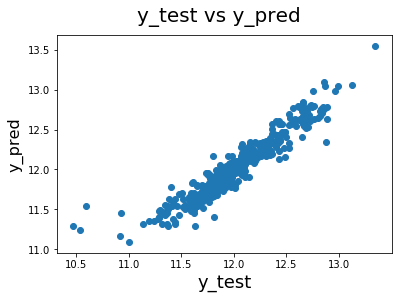

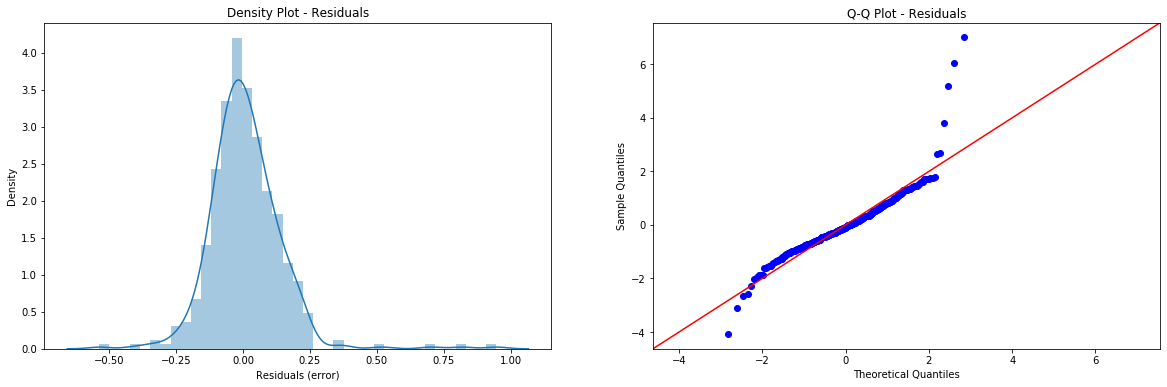

In [146]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_poly)
y_pred_test = ridge.predict(X_test_poly)


metric_ridge_poly = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Lasso Regression - polynomial 30 features

In [147]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = score_param, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_poly, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [148]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [149]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_poly, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

R2 - train: 0.9289131269195322
R2 - test: 0.9007516755780356
RSS - train: 10.694695068987322
RSS - test: 7.399675658080994
MSE - train: 0.010630909611319406, RMSE = 0.1031063024810773
MSE - test: 0.01712887883815045, RMSE = 0.13087734272268234


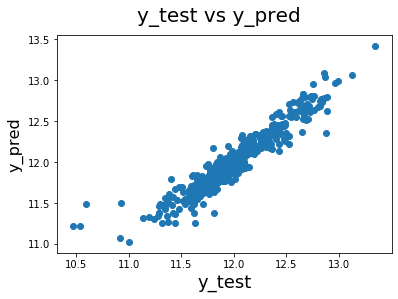

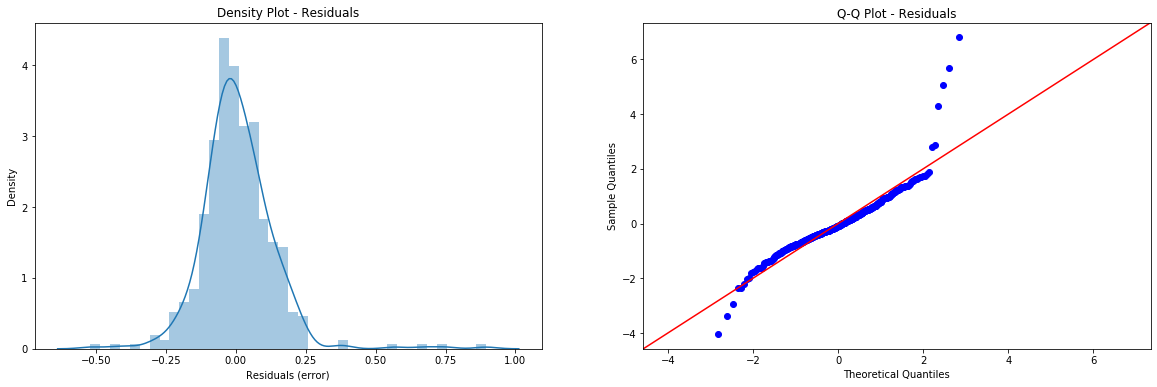

In [150]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_poly)
y_pred_test = lasso.predict(X_test_poly)


metric_lasso_poly = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Comparing Metrics - LR, Ridge, Lasso - rfe

In [151]:
compare_model_metrics(metric_lr_poly, metric_ridge_poly, metric_lasso_poly)


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.95963,0.93133,0.92891
1,R2 Score (Test),-405852262078158733312.00000,0.89543,0.90075
2,RSS (Train),6.07293,10.33123,10.69470
3,RSS (Test),30259202076889019580416.00000,7.79646,7.39968
4,MSE (Train),0.07770,0.10134,0.10311
5,MSE (Test),8369256194.67214,0.13434,0.13088


## Creating a table which contain all the co-efficients

In [152]:
#compare_model_coeff(X_train_poly.columns, lm.coef_,ridge.coef_,lasso.coef_)
 
pd.DataFrame({'Linear':lm.coef_,'Ridge':ridge.coef_,'Lasso':lasso.coef_})    
   

,Linear,Ridge,Lasso
0,-46320591.26703,0.00000,0.00000
1,3.23085,0.01778,0.00000
2,0.84838,0.13505,0.19372
3,-0.29822,0.21956,0.50444
4,0.08684,0.23495,0.58418
5,0.00375,0.06033,0.02967
6,-0.36100,0.06690,-0.00000
7,-0.90811,0.04724,0.00000
8,0.69569,0.20908,0.31071
9,0.18906,0.16670,0.14394


<font color = 'green'>
<b>OBSERVATIONS:</b><br>
- There is not much of improvement in the accuracy of the Ridge or Lasso model by using a polynomial regression.<br>
- Since the complexity of the model will increase, it is better not to use degree 2 polynomial <br>
    
<font>

# ITERATION 5: Check on p-value & VIF - 30 features

From the 4 iterations above, we can go ahead with our analysis with the 30 features identified with RFE.<br>
Now using p-value & VIF, we can try to remove the insignificant features or the multicollinear features.

## Iteration 5.1: statsmodel - 30 features

In [153]:
X_train_lm = X_train_rfe_30.copy()
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     327.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:08   Log-Likelihood:                 737.96
No. Observations:                1006   AIC:                            -1414.
Df Residuals:                     975   BIC:                            -1262.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.78

In [154]:
# VIF
print_vif(X_train_lm)

,Features,VIF
2,OverallQual,49.49000
16,TotRmsAbvGrd,41.90000
18,GarageCars,37.63000
10,GrLivArea,33.07000
19,GarageArea,31.29000
13,BedroomAbvGr,28.95000
3,OverallCond,23.99000
12,FullBath,23.68000
14,KitchenAbvGr,23.43000
5,ExterQual,22.37000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value is greater than 0.05 for the following variables indicating that they could be insignificant for the prediction: LotFrontage,MasVnrArea,ExterQual,FullBath,PoolArea <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variable 'PoolArea' which has the highest p-value and a high VIF as well<br>
</font>

## Iteration 5.2: statsmodel - remove 'PoolArea'

In [155]:
X_train_lm = X_train_rfe_30.drop(['PoolArea'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     338.7
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 737.38
No. Observations:                1006   AIC:                            -1415.
Df Residuals:                     976   BIC:                            -1267.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.79

In [156]:
# VIF
print_vif(X_train_lm)

,Features,VIF
2,OverallQual,49.48000
16,TotRmsAbvGrd,41.14000
18,GarageCars,37.60000
10,GrLivArea,31.99000
19,GarageArea,31.25000
13,BedroomAbvGr,28.93000
3,OverallCond,23.98000
12,FullBath,23.63000
14,KitchenAbvGr,23.41000
5,ExterQual,22.32000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value is greater than 0.05 for the following variables indicating that they could be insignificant for the prediction: LotFrontage,MasVnrArea,ExterQual,FullBath <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variable 'MasVnrArea' which has the highest p-value<br>
</font>

## Iteration 5.3: statsmodel - remove 'MasVnrArea'

In [157]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     350.6
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 736.71
No. Observations:                1006   AIC:                            -1415.
Df Residuals:                     977   BIC:                            -1273.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.78

In [158]:
# VIF
print_vif(X_train_lm)

,Features,VIF
2,OverallQual,49.44000
15,TotRmsAbvGrd,41.14000
17,GarageCars,37.59000
18,GarageArea,31.15000
9,GrLivArea,31.07000
12,BedroomAbvGr,28.92000
3,OverallCond,23.96000
13,KitchenAbvGr,23.41000
11,FullBath,23.36000
4,ExterQual,22.19000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value is greater than 0.05 for the following variables indicating that they could be insignificant for the prediction: LotFrontage,ExterQual,FullBath <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variable 'FullBath' which has a high p-value and a high VIF<br>
</font>

## Iteration 5.4: statsmodel - remove 'FullBath'

In [159]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     363.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 735.66
No. Observations:                1006   AIC:                            -1415.
Df Residuals:                     978   BIC:                            -1278.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.79

In [160]:
# VIF
print_vif(X_train_lm)

,Features,VIF
2,OverallQual,48.71000
14,TotRmsAbvGrd,41.13000
16,GarageCars,37.20000
17,GarageArea,30.84000
9,GrLivArea,28.78000
11,BedroomAbvGr,28.36000
3,OverallCond,23.89000
4,ExterQual,22.06000
12,KitchenAbvGr,20.98000
13,KitchenQual,16.06000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value is greater than 0.05 for the following variables indicating that they could be insignificant for the prediction: LotFrontage,ExterQual <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variable 'LotFrontage' which has a high p-value<br>
</font>

## Iteration 5.5: statsmodel - remove 'LotFrontage'

In [161]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     377.0
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 735.05
No. Observations:                1006   AIC:                            -1416.
Df Residuals:                     979   BIC:                            -1283.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.80

In [162]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallQual,48.64000
13,TotRmsAbvGrd,41.01000
15,GarageCars,37.19000
16,GarageArea,30.75000
8,GrLivArea,28.74000
10,BedroomAbvGr,28.18000
2,OverallCond,23.88000
3,ExterQual,22.06000
11,KitchenAbvGr,20.94000
12,KitchenQual,16.05000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value is greater than 0.05 for the following variables indicating that they could be insignificant for the prediction: ExterQual <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variable 'ExterQual' which has a high p-value and a high VIF (>5) <br>
</font>

## Iteration 5.6: statsmodel - remove 'ExterQual'

In [163]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 733.81
No. Observations:                1006   AIC:                            -1416.
Df Residuals:                     980   BIC:                            -1288.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.80

In [164]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallQual,43.33000
12,TotRmsAbvGrd,41.01000
14,GarageCars,37.18000
15,GarageArea,30.75000
7,GrLivArea,28.74000
9,BedroomAbvGr,28.07000
2,OverallCond,23.88000
10,KitchenAbvGr,20.77000
11,KitchenQual,14.41000
5,TotalBsmtSF,13.46000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-squared and the adjusted R-squared values are good <br>
- The prob(F-stat) is less than 0.05 indicating that the model is significant <br>
- p-value of all the variables is less than 0.05. So only significant variables are present in the model. <br>
- There are many variables with a high VIF value (>5) <br>
- Let us drop the variables with high VIF iteratively to reduce the multicollinearity. GarageCars and GarageArea look to be related, drop 'GarageCars' <br>
</font>

## Iteration 5.7: statsmodel - remove 'GarageCars'

In [165]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     403.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 728.88
No. Observations:                1006   AIC:                            -1408.
Df Residuals:                     981   BIC:                            -1285.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.81

In [166]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallQual,42.74000
12,TotRmsAbvGrd,40.82000
7,GrLivArea,28.73000
9,BedroomAbvGr,28.07000
2,OverallCond,23.87000
10,KitchenAbvGr,20.52000
11,KitchenQual,14.41000
5,TotalBsmtSF,13.42000
14,GarageArea,10.96000
16,YearBuilt_num_years,10.95000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Metrics like R-squared, adjusted R-squared, prob(F-stat), p-values are still good <br>
- Drop the next variable based on VIF, OverallQual and OverallCond look to be related. Drop: OverallQual <br>
</font>

## Iteration 5.8: statsmodel - remove 'OverallQual'

In [167]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     360.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 658.25
No. Observations:                1006   AIC:                            -1269.
Df Residuals:                     982   BIC:                            -1151.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.02

In [168]:
# VIF
print_vif(X_train_lm)

,Features,VIF
11,TotRmsAbvGrd,40.82000
6,GrLivArea,27.96000
8,BedroomAbvGr,27.82000
1,OverallCond,22.02000
9,KitchenAbvGr,20.11000
10,KitchenQual,13.34000
4,TotalBsmtSF,12.62000
15,YearBuilt_num_years,10.65000
13,GarageArea,10.58000
5,HeatingQC,10.28000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- R-Squared value has come down from 90.8% to 89.4%. But since this variable is highly collinear, it is better to drop it. The R-squared and adjusted R-squared values are still good for the model <br>
- prob(F-stat), p-values are still good <br>
- Drop the next variable based on VIF. No. of bedrooms and kitchen is already available. Hence drop: 'TotRmsAbvGrd' <br>
</font>

## Iteration 5.9: statsmodel - remove 'TotRmsAbvGrd'

In [169]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     370.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:09   Log-Likelihood:                 649.92
No. Observations:                1006   AIC:                            -1254.
Df Residuals:                     983   BIC:                            -1141.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.01

In [170]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,21.96000
8,BedroomAbvGr,21.80000
9,KitchenAbvGr,18.98000
6,GrLivArea,17.20000
10,KitchenQual,13.25000
4,TotalBsmtSF,12.59000
14,YearBuilt_num_years,10.62000
12,GarageArea,10.58000
5,HeatingQC,10.27000
15,GarageYrBlt_num_years,7.76000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of some of the variables has become greater than 0.05 indicating that these are insignificant variables <br>
- Drop the next variable based on p-value. Drop: 'BedroomAbvGr' <br>
</font>

## Iteration 5.10: statsmodel - remove 'BedroomAbvGr'

In [171]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     387.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 648.32
No. Observations:                1006   AIC:                            -1253.
Df Residuals:                     984   BIC:                            -1145.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.98

In [172]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,21.07000
8,KitchenAbvGr,16.14000
9,KitchenQual,13.09000
4,TotalBsmtSF,12.59000
6,GrLivArea,12.21000
13,YearBuilt_num_years,10.62000
11,GarageArea,10.57000
5,HeatingQC,10.27000
14,GarageYrBlt_num_years,7.64000
0,LotArea,7.25000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of some variables are still greater than 0.05.  <br>
- Drop the next variable based on p-value. Drop: 'Exterior1st_Wd Sdng' <br>
</font>

## Iteration 5.11: statsmodel - remove 'Exterior1st_Wd Sdng'

In [173]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     405.7
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 646.67
No. Observations:                1006   AIC:                            -1251.
Df Residuals:                     985   BIC:                            -1148.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.98

In [174]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,20.82000
8,KitchenAbvGr,16.09000
9,KitchenQual,13.04000
4,TotalBsmtSF,12.58000
6,GrLivArea,12.21000
11,GarageArea,10.56000
13,YearBuilt_num_years,10.30000
5,HeatingQC,10.25000
14,GarageYrBlt_num_years,7.64000
0,LotArea,7.20000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of some variables are still greater than 0.05.  <br>
- Drop the next variable based on p-value. Drop: 'Exterior2nd_Wd Sdng' <br>
</font>

## Iteration 5.12: statsmodel - remove 'Exterior2nd_Wd Sdng'

In [175]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     427.0
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 646.14
No. Observations:                1006   AIC:                            -1252.
Df Residuals:                     986   BIC:                            -1154.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.98

In [176]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,20.81000
8,KitchenAbvGr,15.94000
9,KitchenQual,13.04000
4,TotalBsmtSF,12.58000
6,GrLivArea,12.20000
11,GarageArea,10.56000
5,HeatingQC,10.24000
13,YearBuilt_num_years,9.68000
14,GarageYrBlt_num_years,7.64000
0,LotArea,7.17000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of 'RoofStyle_Others' is still greater than 0.05.  <br>
- Drop the next variable based on p-value. Drop: 'RoofStyle_Others' <br>
</font>

## Iteration 5.13: statsmodel - remove 'RoofStyle_Others'

In [177]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng','RoofStyle_Others'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     449.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 644.27
No. Observations:                1006   AIC:                            -1251.
Df Residuals:                     987   BIC:                            -1157.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.99

In [178]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,20.79000
8,KitchenAbvGr,15.80000
9,KitchenQual,13.04000
4,TotalBsmtSF,12.48000
6,GrLivArea,12.12000
11,GarageArea,10.53000
5,HeatingQC,10.23000
13,YearBuilt_num_years,9.68000
14,GarageYrBlt_num_years,7.56000
0,LotArea,7.09000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of 'GarageYrBlt_num_years' is still greater than 0.05.  <br>
- Drop the next variable based on p-value. Drop: 'GarageYrBlt_num_years' <br>
</font>

## Iteration 5.14: statsmodel - remove 'GarageYrBlt_num_years'

In [179]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng','RoofStyle_Others','GarageYrBlt_num_years'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     474.4
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 642.58
No. Observations:                1006   AIC:                            -1249.
Df Residuals:                     988   BIC:                            -1161.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0099    

In [180]:
# VIF
print_vif(X_train_lm)

,Features,VIF
1,OverallCond,20.39000
8,KitchenAbvGr,15.41000
9,KitchenQual,13.03000
4,TotalBsmtSF,12.41000
6,GrLivArea,12.03000
11,GarageArea,10.31000
5,HeatingQC,10.21000
0,LotArea,7.04000
13,YearBuilt_num_years,6.97000
3,BsmtFinType1,6.55000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable has not impacted the R-Squared, the adjusted R-squared and the prob(F-stat)<br>
- p-values of all variables less than 0.05 now.  <br>
- VIF is still greater than 5. Let us check the impact of dropping 'OverallCond' <br>
</font>

## Iteration 5.15: statsmodel - remove 'OverallCond'

In [181]:
X_train_lm = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng','RoofStyle_Others','GarageYrBlt_num_years','OverallCond'],axis=1)
sm_model = fit_stats_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     412.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:05:10   Log-Likelihood:                 553.70
No. Observations:                1006   AIC:                            -1073.
Df Residuals:                     989   BIC:                            -989.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2245    

In [182]:
# VIF
print_vif(X_train_lm)

,Features,VIF
7,KitchenAbvGr,14.04000
3,TotalBsmtSF,12.35000
8,KitchenQual,12.03000
5,GrLivArea,11.93000
10,GarageArea,10.20000
4,HeatingQC,9.39000
0,LotArea,7.02000
2,BsmtFinType1,6.00000
12,YearBuilt_num_years,5.24000
1,BsmtExposure,4.42000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Removing this variable reduces the R-Squared from 89.1 to 87% <br>
- Since this variable is sigificant in the model predictions, let us not remove it. <br> 
</font>

## Finalize features after feature reduction based on p-value & VIF

With this let us finalize on the final set of features that we shall be using to build the Ridge & Lasso models

In [183]:
X_train_final = X_train_rfe_30.drop(['PoolArea','MasVnrArea','FullBath','LotFrontage','ExterQual','GarageCars','OverallQual','TotRmsAbvGrd','BedroomAbvGr','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng','RoofStyle_Others','GarageYrBlt_num_years'],axis=1)

In [184]:
X_test_final = X_test_rfe_30[X_train_final.columns]

In [185]:
print(X_train_final.shape)
print(X_test_final.shape)

(1006, 17)
(432, 17)


In [186]:
# Heat Map to check on correlation between the final set of variables
corr = X_train_final.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

,LotArea,OverallCond,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,BsmtFullBath,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,ScreenPorch,YearBuilt_num_years,MSZoning_RM,Foundation_PConc,GarageType_Others
LotArea,1,-0.01,0.2,0.05,0.3,0.03,0.4,0.09,-0.01,0.1,0.3,0.3,0.1,-0.04,-0.3,-0.01,0.08
OverallCond,-0.01,1,-0.06,0.008,-0.2,-0.004,-0.08,-0.05,-0.08,-0.01,-0.03,-0.2,0.06,0.4,0.1,-0.3,-0.05
BsmtExposure,0.2,-0.06,1,0.3,0.4,0.2,0.1,0.3,-0.2,0.2,0.2,0.3,0.07,-0.3,-0.1,0.2,0.06
BsmtFinType1,0.05,0.008,0.3,1,0.3,0.1,0.03,0.6,-0.2,0.2,0.1,0.2,0.02,-0.3,-0.2,0.2,-0.004
TotalBsmtSF,0.3,-0.2,0.4,0.3,1,0.3,0.4,0.3,-0.09,0.4,0.3,0.5,0.1,-0.4,-0.3,0.3,-0.03
HeatingQC,0.03,-0.004,0.2,0.1,0.3,1,0.3,0.07,-0.2,0.5,0.2,0.3,-0.03,-0.4,-0.1,0.5,-0.08
GrLivArea,0.4,-0.08,0.1,0.03,0.4,0.3,1,0.007,0.1,0.4,0.5,0.4,0.1,-0.2,-0.1,0.3,0.04
BsmtFullBath,0.09,-0.05,0.3,0.6,0.3,0.07,0.007,1,-0.04,0.2,0.1,0.2,0.009,-0.2,-0.1,0.08,0.03
KitchenAbvGr,-0.01,-0.08,-0.2,-0.2,-0.09,-0.2,0.1,-0.04,1,-0.2,-0.1,-0.05,-0.06,0.2,0.1,-0.1,0.1
KitchenQual,0.1,-0.01,0.2,0.2,0.4,0.5,0.4,0.2,-0.2,1,0.3,0.5,0.06,-0.5,-0.2,0.5,-0.06


As seen in the above heat map, there is not much of correlation between the variables and hence the direct multicollinearity between two variables have been addressed.

# ITERATION 6: Build Final Models

## Linear Regression - Final Model

R2 - train: 0.8908718253814548
R2 - test: 0.8846004749189328
RSS - train: 16.417834972983485
RSS - test: 8.603863709234586
MSE - train: 0.016319915480102868, RMSE = 0.12774942457836305
MSE - test: 0.019916351178783764, RMSE = 0.1411253031131688


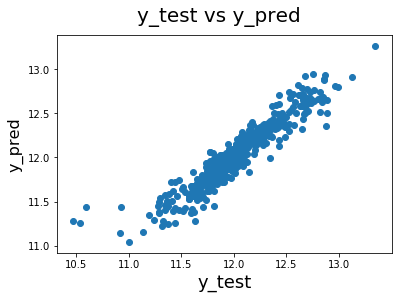

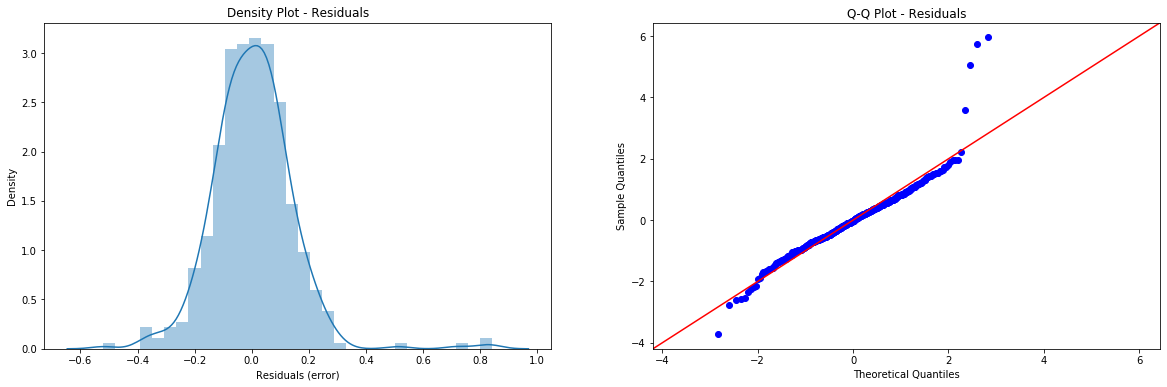

In [187]:
lm = LinearRegression()
lm.fit(X_train_final, y_train)

y_pred_train = lm.predict(X_train_final)
y_pred_test = lm.predict(X_test_final)

metric_lr_final = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Ridge Regression - Final Model

In [188]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = score_param,  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00306,0.00026,0.00125,0.00011,0.00010,{'alpha': 0.0001},-0.09941,-0.08705,-0.08819,-0.09191,...,-0.09240,0.00458,11,-0.08844,-0.09167,-0.09152,-0.09087,-0.09001,-0.09050,0.00119
1,0.00288,0.00061,0.00119,0.00024,0.00100,{'alpha': 0.001},-0.09941,-0.08705,-0.08819,-0.09191,...,-0.09240,0.00458,10,-0.08844,-0.09167,-0.09152,-0.09087,-0.09001,-0.09050,0.00119
2,0.00243,0.00012,0.00107,0.00006,0.01000,{'alpha': 0.01},-0.09939,-0.08703,-0.08820,-0.09189,...,-0.09239,0.00457,9,-0.08843,-0.09166,-0.09151,-0.09086,-0.09000,-0.09049,0.00119
3,0.00226,0.00018,0.00099,0.00015,0.05000,{'alpha': 0.05},-0.09931,-0.08697,-0.08825,-0.09178,...,-0.09235,0.00456,7,-0.08840,-0.09165,-0.09146,-0.09084,-0.08996,-0.09046,0.00119
4,0.00191,0.00023,0.00090,0.00013,0.10000,{'alpha': 0.1},-0.09922,-0.08689,-0.08832,-0.09166,...,-0.09230,0.00454,6,-0.08838,-0.09164,-0.09141,-0.09081,-0.08991,-0.09043,0.00119


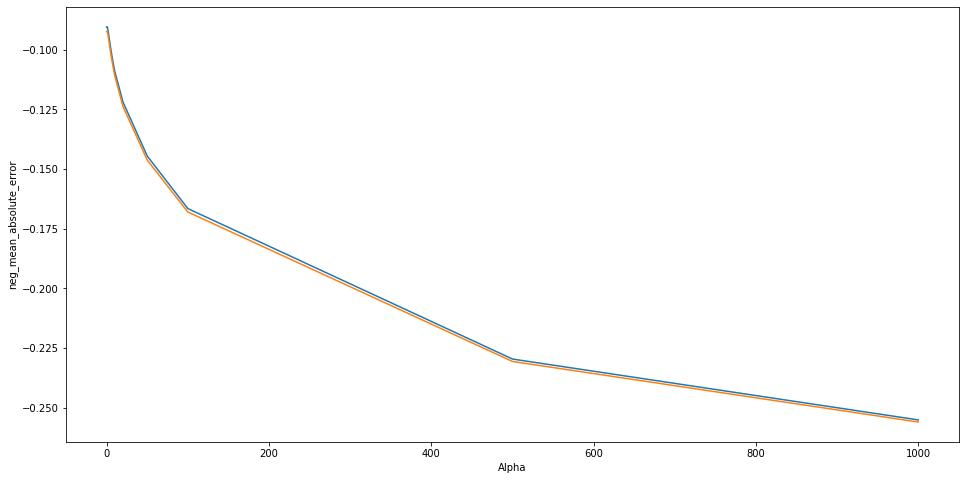

In [189]:
print_alpha_results(model_cv,score_param)

In [190]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [191]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
#print(ridge.coef_)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

R2 - train: 0.8907229081713347
R2 - test: 0.8841651502225693
RSS - train: 16.440238886445204
RSS - test: 8.636320293038938
MSE - train: 0.01634218577181432, RMSE = 0.12783655882342235
MSE - test: 0.01999148215981236, RMSE = 0.14139123791739133


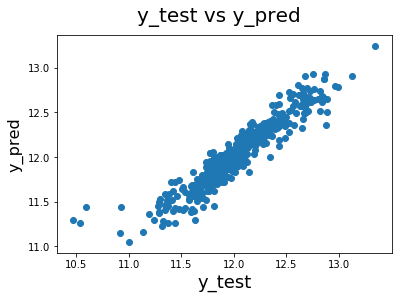

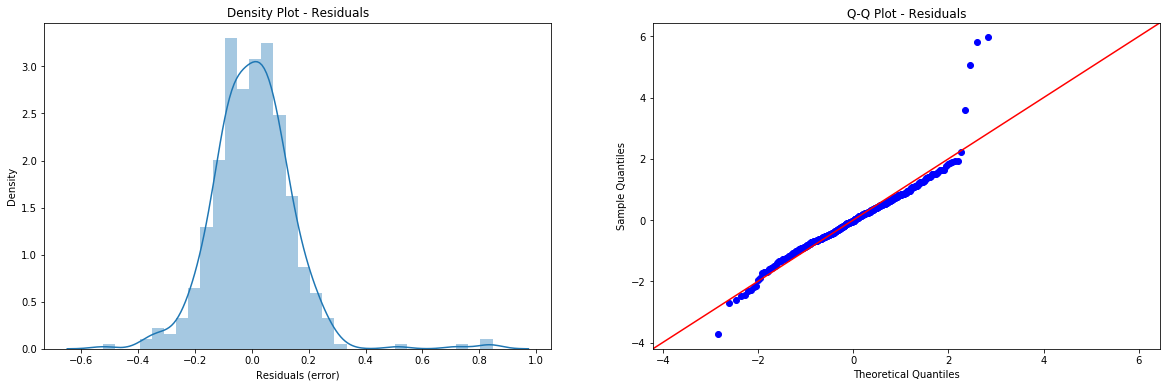

In [192]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_final)
y_pred_test = ridge.predict(X_test_final)


metric_ridge_final = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Lasso Regression - Final Model

In [193]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = score_param, 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.00293,0.00035,0.00116,0.00004,0.00010,{'alpha': 0.0001},-0.09922,-0.08707,-0.08831,-0.09207,...,-0.09246,0.00452,1,-0.08848,-0.09175,-0.09152,-0.09090,-0.09004,-0.09054,0.00119
1,0.00265,0.00003,0.00114,0.00002,0.00100,{'alpha': 0.001},-0.09874,-0.08907,-0.09061,-0.09524,...,-0.09463,0.00419,2,-0.09036,-0.09402,-0.09336,-0.09309,-0.09234,-0.09264,0.00126
2,0.00261,0.00002,0.00113,0.00001,0.01000,{'alpha': 0.01},-0.11936,-0.12882,-0.12040,-0.15594,...,-0.12993,0.01344,3,-0.12716,-0.12888,-0.12907,-0.12859,-0.12708,-0.12816,0.00086
3,0.00273,0.00019,0.00128,0.00015,0.05000,{'alpha': 0.05},-0.25095,-0.25517,-0.24192,-0.29395,...,-0.25747,0.01879,4,-0.26102,-0.25627,-0.25921,-0.24770,-0.25833,-0.25650,0.00466
4,0.00271,0.00036,0.00120,0.00018,0.10000,{'alpha': 0.1},-0.29849,-0.29179,-0.28455,-0.33303,...,-0.29755,0.01882,5,-0.29902,-0.29615,-0.29896,-0.29012,-0.29862,-0.29657,0.00340


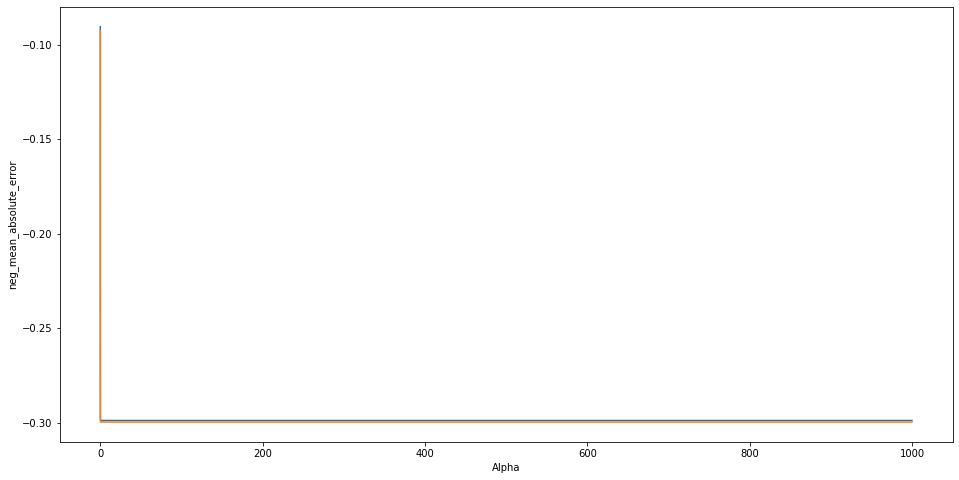

In [194]:
print_alpha_results(model_cv,score_param)

In [195]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [196]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [197]:
lasso.coef_

array([ 0.12364616,  0.47150857,  0.08076507,  0.0510168 ,  0.46215276,
        0.05972676,  1.33187865,  0.08911219, -0.22947652,  0.19279897,
        0.15271018,  0.33546448,  0.12436023, -0.41036753, -0.05852038,
        0.06851177, -0.08483855])

<b>NOTE:</b> none of the co-efficients from LASSO are 0 and hence we cannot eliminate any of them from the model.

R2 - train: 0.8908361444087792
R2 - test: 0.8844661392560799
RSS - train: 16.423203012200783
RSS - test: 8.613879398065755
MSE - train: 0.016325251503181693, RMSE = 0.1277703075960205
MSE - test: 0.01993953564367073, RMSE = 0.14120742063953554


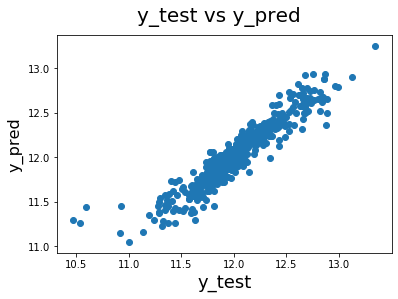

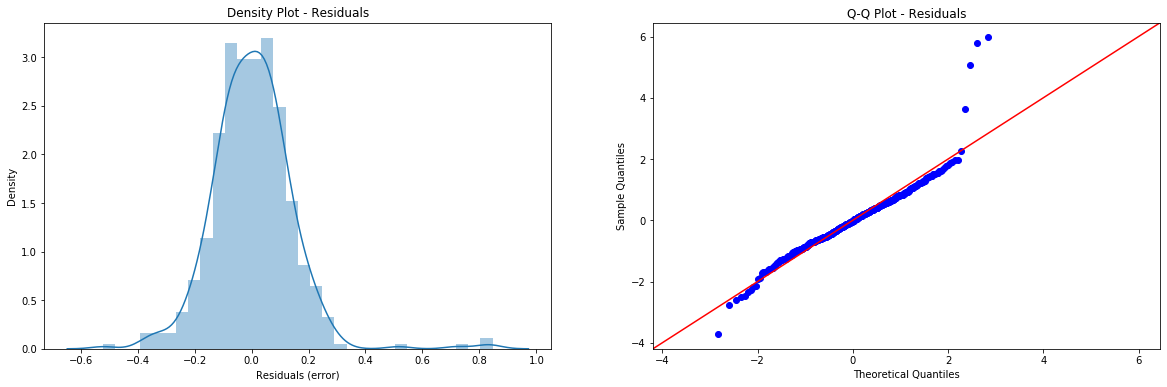

In [198]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test_final)


metric_lasso_final = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

print_pred_plot(y_test, y_pred_test)


## Comparing Metrics - LR, Ridge, Lasso - Final Model

In [199]:
final_metric = compare_model_metrics(metric_lr_final, metric_ridge_final, metric_lasso_final)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.89087,0.89072,0.89084
1,R2 Score (Test),0.88460,0.88417,0.88447
2,RSS (Train),16.41783,16.44024,16.42320
3,RSS (Test),8.60386,8.63632,8.61388
4,MSE (Train),0.12775,0.12784,0.12777
5,MSE (Test),0.14113,0.14139,0.14121


## Creating a table which contain all the co-efficients

In [200]:
betas = compare_model_coeff(X_train_final.columns, lm.coef_,ridge.coef_,lasso.coef_)
betas

,Linear,Ridge,Lasso
LotArea,0.12784,0.13616,0.12365
OverallCond,0.47880,0.46510,0.47151
BsmtExposure,0.08010,0.08063,0.08077
BsmtFinType1,0.04899,0.05157,0.05102
TotalBsmtSF,0.46459,0.45887,0.46215
HeatingQC,0.05893,0.06203,0.05973
GrLivArea,1.34119,1.29389,1.33188
BsmtFullBath,0.09461,0.08914,0.08911
KitchenAbvGr,-0.24831,-0.22255,-0.22948
KitchenQual,0.19009,0.19820,0.19280


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- The performance of Linear Regression, Ridge Regression and Lasso Regression are almost the same.<br>
- We can safely assume that there is no overfitting in the data as the model performs well in both the train and test data in all the 3 models <br>
- None of the co-efficients from the Lasso Regression are 0, hence all of them are significant.
</font>

# SUBJECTIVE QUESTIONS

## RIDGE REGRESSION - alpha & top 5 predictors

In [201]:
# Print the best alpha identified for the RIDGE model
ridge_best_alpha = ridge.get_params()["alpha"]
print(f'Ridge alpha - {ridge_best_alpha}')

Ridge alpha - 0.3


In [202]:
# Get the predictors in rank order
betas['Ridge_abs'] = abs(betas['Ridge'])
betas['Ridge_Rank'] = betas['Ridge_abs'].rank(ascending = False)
betas[['Ridge','Ridge_abs','Ridge_Rank']].sort_values(by='Ridge_Rank')

,Ridge,Ridge_abs,Ridge_Rank
GrLivArea,1.29389,1.29389,1.00000
OverallCond,0.46510,0.46510,2.00000
TotalBsmtSF,0.45887,0.45887,3.00000
YearBuilt_num_years,-0.40308,0.40308,4.00000
GarageArea,0.34129,0.34129,5.00000
KitchenAbvGr,-0.22255,0.22255,6.00000
KitchenQual,0.19820,0.19820,7.00000
Fireplaces,0.15960,0.15960,8.00000
LotArea,0.13616,0.13616,9.00000
ScreenPorch,0.12960,0.12960,10.00000


## LASSO REGRESSION - alpha & top 5 predictors

In [203]:
# Print the best alpha identified for the LASSO model
lasso_best_alpha = lasso.get_params()["alpha"]
print(f'Lasso alpha - {lasso_best_alpha}')

Lasso alpha - 0.0001


In [204]:
# Get the predictors in rank order
betas['Lasso_abs'] = abs(betas['Lasso'])
betas['Lasso_Rank'] = betas['Lasso_abs'].rank(ascending = False)
betas[['Lasso','Lasso_abs','Lasso_Rank']].sort_values(by='Lasso_Rank')

,Lasso,Lasso_abs,Lasso_Rank
GrLivArea,1.33188,1.33188,1.00000
OverallCond,0.47151,0.47151,2.00000
TotalBsmtSF,0.46215,0.46215,3.00000
YearBuilt_num_years,-0.41037,0.41037,4.00000
GarageArea,0.33546,0.33546,5.00000
KitchenAbvGr,-0.22948,0.22948,6.00000
KitchenQual,0.19280,0.19280,7.00000
Fireplaces,0.15271,0.15271,8.00000
ScreenPorch,0.12436,0.12436,9.00000
LotArea,0.12365,0.12365,10.00000


## Doubling alpha

### Doubling alpha - Ridge

In [205]:
# Check the impact on Ridge Regression on doubling the value of alpha
# Best alpha for ridge was 0.3
alpha_double = 0.6
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train_final, y_train)

Ridge(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [206]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train_final)
y_pred_test = ridge_double.predict(X_test_final)
metric_ridge_double = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

R2 - train: 0.890325953823107
R2 - test: 0.8835124234766255
RSS - train: 16.499958853390424
RSS - test: 8.684985761614543
MSE - train: 0.0164015495560541, RMSE = 0.12806853460571063
MSE - test: 0.02010413370744107, RMSE = 0.1417890465002183


### Doubling alpha - Lasso

In [207]:
# Check the impact on Lasso Regression on doubling the value of alpha
# Best alpha for lasso was 0.0001
alpha_double = 0.0002
lasso_double = Lasso(alpha=alpha_double)

lasso_double.fit(X_train_final, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [208]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_double.predict(X_train_final)
y_pred_test = lasso_double.predict(X_test_final)


metric_lasso_double = print_metrics(y_train, y_test, y_pred_train,y_pred_test)

R2 - train: 0.8907293419706083
R2 - test: 0.8842615526148634
RSS - train: 16.439270950757727
RSS - test: 8.629132802068238
MSE - train: 0.01634122360910311, RMSE = 0.12783279551470003
MSE - test: 0.019974844449232032, RMSE = 0.14133238995089567


### Compare metrics after doubling alpha

In [209]:
# Compare the metrics after doubling alpha
ridge_double_metric = pd.Series(metric_ridge_double, name = 'Ridge-Double Alpha')
lasso_double_metric = pd.Series(metric_lasso_double, name = 'Lasso-Double Alpha')

final_metric = pd.concat([final_metric,ridge_double_metric,lasso_double_metric], axis = 1)
final_metric[['Metric','Ridge Regression','Ridge-Double Alpha','Lasso Regression','Lasso-Double Alpha']]

,Metric,Ridge Regression,Ridge-Double Alpha,Lasso Regression,Lasso-Double Alpha
0,R2 Score (Train),0.89072,0.89033,0.89084,0.89073
1,R2 Score (Test),0.88417,0.88351,0.88447,0.88426
2,RSS (Train),16.44024,16.49996,16.42320,16.43927
3,RSS (Test),8.63632,8.68499,8.61388,8.62913
4,MSE (Train),0.12784,0.12807,0.12777,0.12783
5,MSE (Test),0.14139,0.14179,0.14121,0.14133


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- There is not much of impact in doubling the alpha in both Ridge & Lasso<br>
- The metrics for R2 Score, RSS and MSE is almost the same in all the models.
</font>

### Important predictors after doubling alpha

In [210]:
# Get the predictors in rank order - Ridge
betas['Ridge_double'] = ridge_double.coef_
betas['Ridge_double_abs'] = abs(betas['Ridge_double'])
betas['Ridge_double_Rank'] = betas['Ridge_double_abs'].rank(ascending = False)

# Get the predictors in rank order - Lasso
betas['Lasso_double'] = lasso_double.coef_
betas['Lasso_double_abs'] = abs(betas['Lasso_double'])
betas['Lasso_double_Rank'] = betas['Lasso_double_abs'].rank(ascending = False)

betas[['Ridge','Ridge_Rank','Ridge_double','Ridge_double_Rank','Lasso','Lasso_Rank','Lasso_double','Lasso_double_Rank']].sort_values(by='Ridge_double_Rank')

,Ridge,Ridge_Rank,Ridge_double,Ridge_double_Rank,Lasso,Lasso_Rank,Lasso_double,Lasso_double_Rank
GrLivArea,1.29389,1.00000,1.25084,1.00000,1.33188,1.00000,1.32264,1.00000
TotalBsmtSF,0.45887,3.00000,0.45330,2.00000,0.46215,3.00000,0.45977,3.00000
OverallCond,0.46510,2.00000,0.45217,3.00000,0.47151,2.00000,0.46418,2.00000
YearBuilt_num_years,-0.40308,4.00000,-0.39225,4.00000,-0.41037,4.00000,-0.40590,4.00000
GarageArea,0.34129,5.00000,0.34582,5.00000,0.33546,5.00000,0.33498,5.00000
KitchenQual,0.19820,7.00000,0.20554,6.00000,0.19280,7.00000,0.19553,7.00000
KitchenAbvGr,-0.22255,6.00000,-0.20062,7.00000,-0.22948,6.00000,-0.21071,6.00000
Fireplaces,0.15960,8.00000,0.16772,8.00000,0.15271,8.00000,0.15481,8.00000
LotArea,0.13616,9.00000,0.14337,9.00000,0.12365,10.00000,0.11940,9.00000
ScreenPorch,0.12960,10.00000,0.12888,10.00000,0.12436,9.00000,0.11845,10.00000


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- There is not much of impact in doubling the alpha in both Ridge & Lasso<br>
- All the co-efficients have reduced after doubling the alpha. Increasing alpha generalises the model and hence the co-efficients value will reduce as the model generalises. <br>
- RIDGE - Rankings of few predictors have interchanged after doubling alpha. <br>
- LASSO - The top 8 predictors are the same after doubling alpha. 
</font>

## Removing top 5 predictors from data

### Ridge - removing top 5 predictors from data

In [211]:
# Get the top 5 predictors for ridge
ridge_top5 = betas[['Ridge','Ridge_Rank']].sort_values(by='Ridge_Rank').head(5)
ridge_top5


,Ridge,Ridge_Rank
GrLivArea,1.29389,1.00000
OverallCond,0.46510,2.00000
TotalBsmtSF,0.45887,3.00000
YearBuilt_num_years,-0.40308,4.00000
GarageArea,0.34129,5.00000


In [212]:
X_train_final_drop5 = X_train_final.drop(ridge_top5.index,axis=1)
X_test_final_drop5 = X_test_final.drop(ridge_top5.index,axis=1)
X_train_final_drop5.shape

(1006, 12)

In [213]:
ridge_drop5 = Ridge(alpha=ridge_best_alpha)
ridge_drop5.fit(X_train_final_drop5, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [214]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_drop5.predict(X_train_final_drop5)
y_pred_test = ridge_drop5.predict(X_test_final_drop5)

metric_ridge_drop5 = print_metrics(y_train, y_test, y_pred_train,y_pred_test)


R2 - train: 0.7021525381695457
R2 - test: 0.7105584807948477
RSS - train: 44.80978897106368
RSS - test: 21.57994481593845
MSE - train: 0.04454253376845296, RMSE = 0.21105102171857157
MSE - test: 0.04995357596282049, RMSE = 0.22350296634009242


In [215]:
# Get the predictors in rank order - Ridge after dropping 5
ridge_betas = pd.DataFrame(index=X_train_final_drop5.columns)
ridge_betas.rows = X_train_final_drop5.columns

ridge_betas['Ridge_drop5'] = ridge_drop5.coef_
ridge_betas['Ridge_drop5_abs'] = abs(ridge_betas['Ridge_drop5'])
ridge_betas['Ridge_drop5_Rank'] = ridge_betas['Ridge_drop5_abs'].rank(ascending = False)

ridge_betas[['Ridge_drop5_Rank','Ridge_drop5']].sort_values(by='Ridge_drop5_Rank')


,Ridge_drop5_Rank,Ridge_drop5
KitchenQual,1.00000,0.61434
LotArea,2.00000,0.60196
Fireplaces,3.00000,0.44951
ScreenPorch,4.00000,0.20642
KitchenAbvGr,5.00000,0.18380
Foundation_PConc,6.00000,0.15518
HeatingQC,7.00000,0.14557
BsmtExposure,8.00000,0.13420
BsmtFinType1,9.00000,0.12894
MSZoning_RM,10.00000,-0.11573


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- The model performance falls drastically on removing the top 5 predictors<br>
- R2 is almost 70% now in both train and test data<br>
</font>

### Lasso - removing top 5 predictors from data

In [216]:
# Get the top 5 predictors for lasso
lasso_top5 = betas[['Lasso','Lasso_Rank']].sort_values(by='Lasso_Rank').head(5)
lasso_top5


,Lasso,Lasso_Rank
GrLivArea,1.33188,1.00000
OverallCond,0.47151,2.00000
TotalBsmtSF,0.46215,3.00000
YearBuilt_num_years,-0.41037,4.00000
GarageArea,0.33546,5.00000


In [217]:
X_train_lasso_drop5 = X_train_final.drop(lasso_top5.index,axis=1)
X_test_lasso_drop5 = X_test_final.drop(lasso_top5.index,axis=1)
X_train_lasso_drop5.shape

(1006, 12)

In [218]:
lasso_drop5 = Lasso(alpha=lasso_best_alpha)
lasso_drop5.fit(X_train_lasso_drop5, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [219]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_drop5.predict(X_train_lasso_drop5)
y_pred_test = lasso_drop5.predict(X_test_lasso_drop5)

metric_lasso_drop5 = print_metrics(y_train, y_test, y_pred_train,y_pred_test)


R2 - train: 0.7021473074250582
R2 - test: 0.7108666282458167
RSS - train: 44.810575912658585
RSS - test: 21.55697020951245
MSE - train: 0.04454331601655923, RMSE = 0.21105287493080788
MSE - test: 0.04990039400350104, RMSE = 0.22338396093609997


In [220]:
# Get the predictors in rank order - Lasso after dropping 5
lasso_betas = pd.DataFrame(index=X_train_lasso_drop5.columns)
lasso_betas.rows = X_train_lasso_drop5.columns

lasso_betas['Lasso_drop5'] = lasso_drop5.coef_
lasso_betas['Lasso_drop5_abs'] = abs(lasso_betas['Lasso_drop5'])
lasso_betas['Lasso_drop5_Rank'] = lasso_betas['Lasso_drop5_abs'].rank(ascending = False)

lasso_betas[['Lasso_drop5_Rank','Lasso_drop5']].sort_values(by='Lasso_drop5_Rank')


,Lasso_drop5_Rank,Lasso_drop5
KitchenQual,1.00000,0.61790
LotArea,2.00000,0.60920
Fireplaces,3.00000,0.44936
ScreenPorch,4.00000,0.20204
KitchenAbvGr,5.00000,0.17370
Foundation_PConc,6.00000,0.15492
HeatingQC,7.00000,0.14400
BsmtExposure,8.00000,0.13262
BsmtFinType1,9.00000,0.12946
MSZoning_RM,10.00000,-0.11448


<font color='green'>
<b>OBSERVATIONS:</b> <br>
- Similar to Ridge, Lasso's performance also falls drastically on removing the top 5 predictors<br>
- R2 is almost 70% now in both train and test data<br>
</font>